# Project 3: Reddit API NLP Classification

## Problem Statement

Being part of the Data Science Marketing Team of a coding bootcamp, I am interested in finding out what popular topics and keyword jargons belong to the fields of Data Science and Software Engineering. Conducting analysis on Reddit posts will allow me to craft online content and advertisements to better target people interested in Data Science or Software Engineering.

The main objective of this project is to scrape two subreddits: `Software Engineering` and `Data Science` through a webscrapper, leveraging on Reddit's API. The scraped data from the two subreddits will then be passed through various classification models, `CountVectorizer/TfidVectorizer` with `Naive Bayes Classifier`, `LogisticRegression`, `Random Forest`, `KNeighbours` and `Support Vector Classifier` that will assign each observation to the most likely class of subreddit. The models should help the data science marketing team of my company identify what makes the respective subreddit posts unique from one another.

In this process, the subreddit posts will undergo preprocessing and EDA. The success of the models that we decide on will be determined through the highest accuracy based on the scores obtained.

## Executive Summary

Natural Language Processing, or NLP for short, involves using specialized machine learning techniques to make predictions about the text in a body of documents, including things like authorship attribution, sentiment analysis, text generation, and in some cases the appearance of something resembling semantic understanding.

Career paths like Software Engineering and Data Science have become the most in-demand fields for many people in this rapidly changing world. Within these career paths, there are many terms and topics that are similar given the cross-sectionality of both jobs. However, there are still some aspects in Data Science jobs that differ from Software Engineering jobs and vice versa.

In this project, I would like to further explore the key similarities and differences between Data Science and Software Engineering in terms of the current discussions and topics that people are discussing on Reddit. Reddit, in recent times, have become a popular avenue for people all over the world to ask one another about different career prospects and experiences. As such, scraping Subreddit Posts gives us an interesting source of data that we can analyze to understand what are the popular topics in these respective career fields.

The web scraping portion of this project is covered in another notebook. In this notebook, I will be covering the steps taken to clean and analyze the data collected, as well as further steps taken to pre-process the text data, visualize the data, use different models to find the optimal model and analyze misclassified posts.

## Contents:
- [Data Collection](#Data-Collection)
- [Data Cleaning](#Data-Cleaning)
- [Explanatory Data Analysis](#Explanatory-Data-Analysis)
- [Pre-Processing](#Pre-Processing)
- [Data Visualization](#Data-Visualization)
- [Modelling](#Modelling)
- [Evaluation](#Evaluation)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)

## Data Collection

### Importing Packages

In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)

# Import Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib_venn import venn2

# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# Import sklearn Packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

I have outlined my process of scraping data in the other Jupyter Notebook in this project folder. In this notebook, I will be reading in the csv files that contain my scrapped data for both the software engineering and data science subreddit posts.

In [2]:
# Reading in the swe_df that we saved as a csv previously
swe_df = pd.read_csv('./data/swe_data.csv')
swe_df.sample(5)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,poll_data,post_hint,url_overridden_by_dest,preview,crosspost_parent_list,crosspost_parent,media_metadata
637,NaN,SoftwareEngineering,Does working at one of the FAANG companies liv...,t2_tmrjcts,False,NaN,0,False,Working at a FAANG company,[],r/SoftwareEngineering,False,6,NaN,0,NaN,NaN,False,t3_gfolkb,False,dark,0.85,NaN,public,13,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,13,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.588952e+09,text,6,NaN,NaN,text,self.SoftwareEngineering,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qmng,NaN,NaN,NaN,gfolkb,True,NaN,UncommonNinetySix,NaN,13,True,all_ads,False,[],False,NaN,/r/SoftwareEngineering/comments/gfolkb/working...,all_ads,False,https://www.reddit.com/r/SoftwareEngineering/c...,24671,1.588923e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,SoftwareEngineering,by that I mean the feature was inhibited by th...,t2_39epvhvz,False,NaN,0,False,What was the simplest feature you had to imple...,[],r/SoftwareEngineering,False,6,NaN,0,NaN,NaN,False,t3_iiv36q,False,dark,1.00,NaN,public,1,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,1,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.598746e+09,text,6,NaN,NaN,text,self.SoftwareEngineering,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qmng,NaN,NaN,NaN,iiv36q,True,NaN,cagson6969,NaN,2,True,all_ads,False,[],False,NaN,/r/SoftwareEngineering/comments/iiv36q/what_wa...,all_ads,False,https://www.reddit.com/r/SoftwareEngineering/c...,24671,1.598718e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,NaN,SoftwareEngineering,I've been working in a sales role now for abou...,t2_47dt8j6x,False,NaN,0,False,Any recommendations on part-time software engi...,[],r/SoftwareEngineering,False,6,NaN,0,NaN,NaN,False,t3_gnztik,False,dark,1.00,NaN,public,1,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,1,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.590107e+09,text,6,NaN,NaN,text,self.SoftwareEngineering,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qmng,NaN,NaN,NaN,gnztik,True,NaN,Joe_HookemSnivy,NaN,1,True,all_ads,False,[],False,NaN,/r/SoftwareEngineering/comments/gnztik/any_rec...,all_ads,False,https://www.reddit.com/r/SoftwareEngineering/c...,24671,1.590078e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,SoftwareEngineering,I am learning ab

In [3]:
# Reading in the ds_df that we saved as a csv previously
ds_df = pd.read_csv('./data/ds_data.csv')
ds_df.sample(5)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,post_hint,url_overridden_by_dest,preview,crosspost_parent_list,crosspost_parent,author_cakeday,poll_data
347,NaN,datascience,"When I start a new project,I always look at a ...",t2_2xjmmewz,False,NaN,0,False,Is it just me or are Kaggle kernels unnecessar...,[],r/datascience,False,6,discussion,0,NaN,NaN,False,t3_i2rnap,False,dark,0.78,NaN,public,5,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Discussion,False,5,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.596463e+09,text,6,NaN,NaN,text,self.datascience,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2sptq,NaN,NaN,NaN,i2rnap,True,NaN,Delta1413,NaN,12,True,all_ads,False,[],False,NaN,/r/datascience/comments/i2rnap/is_it_just_me_o...,all_ads,False,https://www.reddit.com/r/datascience/comments/...,285444,1.596434e+09,0,NaN,False,4fad7108-d77d-11e7-b0c6-0ee69f155af2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,datascience,I’ve spent the last 6 years as a Data Scientis...,t2_51bx7,False,NaN,0,False,Data Scientist to Data Analyst,[],r/datascience,False,6,career,0,NaN,NaN,False,t3_i86qj5,False,dark,0.86,NaN,public,5,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Career,False,5,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.597233e+09,text,6,NaN,NaN,text,self.datascience,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2sptq,NaN,NaN,NaN,i86qj5,True,NaN,SeniorWiggins,NaN,10,True,all_ads,False,[],False,NaN,/r/datascience/comments/i86qj5/data_scientist_...,all_ads,False,https://www.reddit.com/r/datascience/comments/...,285443,1.597204e+09,0,NaN,False,a6ee6fa0-d780-11e7-b6d0-0e0bd8823a7e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,datascience,I see a lot of you guys posting drawings you c...,t2_2ri7uxod,False,NaN,0,False,Getting off the ground: Illustration AI,[],r/datascience,False,6,discussion,0,NaN,NaN,False,t3_ihp53j,False,dark,0.60,NaN,public,1,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Discussion,False,1,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.598577e+09,text,6,NaN,NaN,text,self.datascience,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2sptq,NaN,NaN,NaN,ihp53j,True,NaN,Rowdy202,NaN,0,True,all_ads,False,[],False,NaN,/r/datascience/comments/ihp53j/getting_off_the...,all_ads,False,https://www.reddit.com/r/datascience/comments/...,285442,1.598549e+09,0,NaN,False,4fad7108

In [4]:
print(swe_df.shape)
print(ds_df.shape)

(721, 111)
(562, 112)


## Data Cleaning

Firstly, we will look at the columns that have null values in our data sets and see how we can remove such columns accordingly.

In [5]:
# Overview of Missing Data in swe_df
missing_data = swe_df.isnull().sum()/swe_df.shape[0]
print(str('The number of columns with that have more than 50% consisting of null values is:'), len(missing_data[missing_data>0.5]))
missing_data[missing_data>0.5].sort_values()

The number of columns with that have more than 50% consisting of null values is: 39


preview                          0.879334
post_hint                        0.879334
author_flair_text_color          0.987517
poll_data                        0.988904
thumbnail_height                 0.990291
thumbnail_width                  0.990291
media_metadata                   0.991678
url_overridden_by_dest           0.998613
crosspost_parent_list            1.000000
media                            1.000000
author_flair_text                1.000000
discussion_type                  1.000000
report_reasons                   1.000000
link_flair_background_color      1.000000
removal_reason                   1.000000
mod_reason_by                    1.000000
distinguished                    1.000000
num_reports                      1.000000
removed_by                       1.000000
view_count                       1.000000
approved_at_utc                  1.000000
suggested_sort                   1.000000
mod_reason_title                 1.000000
link_flair_css_class             1

In [6]:
# Remove all these columns in swe_df that have more than 50% consisting of null values
drop_cols = missing_data[missing_data>0.5].index
swe_df.drop(drop_cols, axis=1, inplace=True)
swe_df.shape

(721, 72)

We are now left with 72 columns, down from 111 columns initially. Next, let's look at the data types of the remaining columns in swe_df.

In [7]:
# Overview of Datatypes of the remaining columns in swe_df
swe_df.dtypes.value_counts()

object     33
bool       26
int64      10
float64     3
dtype: int64

Firstly, let's remove all the columns with boolean data types as they probably will not be very helpful in our modelling.

In [8]:
swe_df.select_dtypes(include='bool').columns

Index(['saved', 'clicked', 'hidden', 'hide_score', 'quarantine',
       'is_original_content', 'is_reddit_media_domain', 'is_meta',
       'can_mod_post', 'is_self', 'allow_live_comments', 'archived',
       'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'media_only',
       'can_gild', 'spoiler', 'locked', 'visited', 'is_robot_indexable',
       'send_replies', 'contest_mode', 'stickied', 'is_video'],
      dtype='object')

In [9]:
# Dropping boolean columns
drop_cols = swe_df.select_dtypes(include='bool').columns
swe_df.drop(drop_cols, axis=1, inplace=True)

Secondly, let's zoom in on the object columns to see which columns we should keep.

In [10]:
swe_df.select_dtypes(include='object').head()

,subreddit,selftext,author_fullname,title,link_flair_richtext,subreddit_name_prefixed,name,link_flair_text_color,subreddit_type,media_embed,user_reports,secure_media_embed,author_premium,thumbnail,edited,author_flair_richtext,gildings,link_flair_type,author_flair_type,domain,selftext_html,all_awardings,awarders,treatment_tags,subreddit_id,id,author,whitelist_status,mod_reports,author_patreon_flair,permalink,parent_whitelist_status,url
0,SoftwareEngineering,Hi /r/SoftwareEngineering - This is just to le...,t2_6w5wq,Style changes and automoderator,[],r/SoftwareEngineering,t3_cbpgfx,dark,public,{},[],{},False,self,False,[],{},text,text,self.SoftwareEngineering,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",[],[],[],t5_2qmng,cbpgfx,Tred27,all_ads,[],False,/r/SoftwareEngineering/comments/cbpgfx/style_c...,all_ads,https://www.reddit.com/r/SoftwareEngineering/c...
1,SoftwareEngineering,I have been at several large companies now and...,t2_59dwm06,How do your companies keep track of multiple s...,[],r/SoftwareEngineering,t3_inz7gf,dark,public,{},[],{},False,self,False,[],{},text,text,self.SoftwareEngineering,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",[],[],[],t5_2qmng,inz7gf,arven_ekargon,all_ads,[],False,/r/SoftwareEngineering/comments/inz7gf/how_do_...,all_ads,https://www.reddit.com/r/SoftwareEngineering/c...
2,SoftwareEngineering,"I am doing a Uni course on Data Engineering, w...",t2_57j4x5fp,How to learn programming fundamentals?,[],r/SoftwareEngineering,t3_ins3wm,dark,public,{},[],{},False,self,1599420516.0,[],{},text,text,self.SoftwareEngineering,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",[],[],[],t5_2qmng,ins3wm,AMGraduate564,all_ads,[],False,/r/SoftwareEngineering/comments/ins3wm/how_to_...,all_ads,https://www.reddit.com/r/SoftwareEngineering/c...
3,SoftwareEngineering,NaN,t2_ayl6m,On house building and software development pro...,[],r/SoftwareEngineering,t3_innvzx,dark,public,{},[],{},False,https://b.thumbs.redditmedia.com/Ly_ESOgCG5bCG...,False,[],{},text,text,blog.frankel.ch,NaN,[],[],[],t5_2qmng,innvzx,nfrankel,all_ads,[],False,/r/SoftwareEngineering/comments/innvzx/on_hous...,all_ads,https://blog.frankel.ch/on-house-building-soft...
4,SoftwareEngineering,I’ve been learning to code using Udemy and thi...,t2_60gqusa6,Learning to code,[],r/SoftwareEngineering,t3_ineb6z,dark,public,{},[],{},False,self,False,[],{},text,text,self.SoftwareEngineering,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",[],[],[],t5_2qmng,ineb6z,jrsteck_,all_ads,[],False,/r/SoftwareEngineering/comments/ineb6z/learnin...,all_ads,https://www.reddit.com/r/SoftwareEngineering/c...


We will only keep the 'subreddit', 'selftext' and 'title' columns at this point as they have the most variety of words to aid us in our modelling process later on.

In [11]:
# Selected object columns
object_cols = ['subreddit', 'selftext', 'title']

Thirdly, let's also zoom in on the numerical columns to see which columns we should keep.

In [12]:
swe_df.select_dtypes(include='number').head()

,gilded,pwls,downs,upvote_ratio,ups,total_awards_received,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
0,0,6,0,0.72,3,0,3,1.562837e+09,6,0,24671,1.562808e+09,0
1,0,6,0,0.72,3,0,3,1.599475e+09,6,10,24671,1.599446e+09,0
2,0,6,0,0.76,8,0,8,1.599449e+09,6,13,24671,1.599420e+09,0
3,0,6,0,0.58,2,0,2,1.599435e+09,6,0,24671,1.599406e+09,0
4,0,6,0,1.00,15,0,15,1.599389e+09,6,10,24671,1.599360e+09,0


We will only keep the 'upvote_ratio', 'ups', 'num_comments' and 'subreddit_subscribers' columns at this point as they could probably give us some interesting insights into user behaviour for our analysis later on. 

In [13]:
# Selected numerical columns
numerical_cols = ['upvote_ratio', 'ups', 'num_comments', 'subreddit_subscribers']

In [14]:
# Creation of Software Engineering DataFrame with only the selected columns
swe_final = swe_df[object_cols + numerical_cols]

# Check on missing value
swe_final.isnull().sum()

subreddit                0
selftext                 1
title                    0
upvote_ratio             0
ups                      0
num_comments             0
subreddit_subscribers    0
dtype: int64

In [15]:
# Dropping row with null values
swe_final.dropna(subset=['selftext'], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# Verification Check
swe_final.isnull().sum()

subreddit                0
selftext                 0
title                    0
upvote_ratio             0
ups                      0
num_comments             0
subreddit_subscribers    0
dtype: int64

Great, we no longer have any missing values in this df! Next, we will perform some feature engineering by combining the words in the 'selftext' and 'title' columns together into a single colum. Also, we will create a target variable to distinguish which rows belong to SWE and DS subreddit threads when we combine both dfs later on. By doing so, we can remove the 'subreddit' column as well.

### Feature Engineering

In [17]:
# Combining selftext and title columns
swe_final['text'] = swe_final['title'] + ' ' + swe_final['selftext']

# Creation of target variable
swe_final['ds'] = 0

# Removing original columns that we have feature engineered
swe_final.drop(['selftext','title','subreddit'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [18]:
# Overview of remaining columns left in swe_final
print(swe_final.shape)
swe_final.sample(10)

(720, 6)


,upvote_ratio,ups,num_comments,subreddit_subscribers,text,ds
661,1.00,2,1,24671,Question from someone trying to decide their c...,0
27,0.50,0,2,24671,Question (help need asap) Im doing a research ...,0
596,0.56,1,5,24671,help with React and Javascript coding I'm a yo...,0
56,1.00,3,5,24671,"Doubts about my future Hey guys, I'm a first y...",0
398,1.00,10,7,24671,Microsoft Azure What is your experience using ...,0
86,0.67,1,1,24671,Need help designing a Chess Game I’m making a ...,0
44,1.00,19,9,24671,Quality of .net core source - what is the reas...,0
435,0.63,2,3,24671,Doing a Mphil in Software Engineering and don'...,0
327,1.00,1,5,24671,What should someone know to be a valuable soft...,0
492,0.75,2,18,24671,Is it really normal that my Project Manager is...,0


Let's perform the same steps as above on the ds_df to get the same number of columns in both dataframes.

In [19]:
# Creation of Data Science DataFrame with only the selected columns
ds_final = ds_df[object_cols + numerical_cols]

# Check on missing value
ds_final.isnull().sum()

subreddit                0
selftext                 1
title                    0
upvote_ratio             0
ups                      0
num_comments             0
subreddit_subscribers    0
dtype: int64

In [20]:
# Dropping row with null values
ds_final.dropna(subset=['selftext'], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Verification Check
ds_final.isnull().sum()

subreddit                0
selftext                 0
title                    0
upvote_ratio             0
ups                      0
num_comments             0
subreddit_subscribers    0
dtype: int64

In [22]:
# Combining selftext and title columns
ds_final['text'] = ds_final['title'] + ' ' + ds_final['selftext']

# Creation of target variable
ds_final['ds'] = 1

# Removing original columns that we have feature engineered
ds_final.drop(['selftext','title','subreddit'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [23]:
# Overview of remaining columns left in ds_final
print(ds_final.shape)
ds_final.sample(10)

(561, 6)


,upvote_ratio,ups,num_comments,subreddit_subscribers,text,ds
420,0.25,0,5,285444,"Azure vs. AWS, Which one to learn? There are c...",1
83,1.00,1,6,285442,Does the issue with imbalanced datasets occur ...,1
170,0.75,2,2,285442,Kaggle Datasets: Worthless to make notebooks o...,1
378,0.50,0,25,285444,"Offer Evaluation Help!! Hi DS community,\n\nJu...",1
317,0.40,0,12,285444,On average how long does it take 1 Data Scient...,1
110,1.00,2,2,285442,Data reconciliation vs. Data Remediation Hi ev...,1
346,1.00,2,12,285444,Predicted regression variable distribution ver...,1
36,0.33,0,9,285442,Non-traditional Junior DS - Feeling stifled an...,1
536,0.50,0,11,285444,Predicting probability of an event Say I'm mod...,1
99,0.67,1,0,285442,Should I take a Data Analyst Apprenticeship? -...,1


Now that we have standardized the number of columns for both dataframes, let's merge both dataframes together into a combined dataframe.

In [24]:
# Merging dsi and swe sets together
combined_df = pd.concat([swe_final, ds_final], axis = 0).reset_index(drop = True)
print(combined_df.shape)
combined_df.sample(10)

(1281, 6)


,upvote_ratio,ups,num_comments,subreddit_subscribers,text,ds
216,0.67,3,16,24671,Input on Database Solution for small web app I...,0
1219,1.00,3,7,285444,Senior role in outsourcing company? I may have...,1
712,0.67,5,7,24671,Code Reviews: Honey Trap for Pedants? Or Power...,0
503,0.95,14,23,24671,Have got a decent entry level/graduate offer a...,0
1084,0.67,2,10,285444,On Calculating Certainty I have been making mo...,1
1241,0.85,19,6,285444,Directors/VPs &amp; up: How do your technical ...,1
553,0.57,1,3,24671,CS Undergrad Advice How early should I start l...,0
769,1.00,1,15,285442,"What’s your experience with non-engineer, non-...",1
842,0.42,0,29,285442,How hard is being a DS? (For a person who is b...,1
208,0.73,5,2,24671,Time-Driven Development: The Way to Software D...,0


In total, the combined dataframe has 1,281 rows of posts and 6 columns. 720 rows belong to Software Engineering subreddit posts while 561 rows belong to Data Science subreddit posts.

## Explanatory Data Analysis

Firstly, we can perform some EDA on the numerical columns of our data set. For the 'text' column, we will have to do some pre-processing before conducting further analysis later on.

In [25]:
# Overview of Numerical Columns
combined_df.groupby('ds').mean()

,upvote_ratio,ups,num_comments,subreddit_subscribers
ds,,,,
0,0.804375,4.993056,6.141667,24671.000000
1,0.776114,45.402852,20.226381,285443.094474


Text(0, 0.5, 'Subscriber Count')

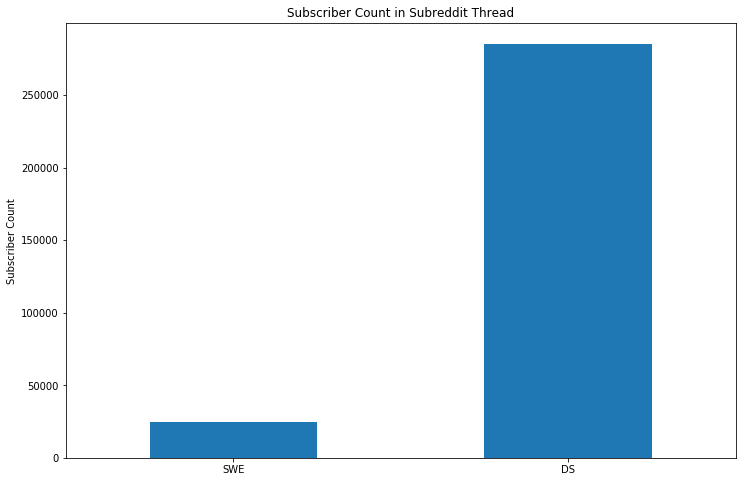

In [26]:
# Comparison of subreddit subscribers between swe and dsi threads
plt.figure(figsize=(12,8))
combined_df.groupby('ds').mean()['subreddit_subscribers'].plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Subscriber Count in Subreddit Thread')
plt.xticks(ticks=[0, 1], labels=['SWE', 'DS'])
plt.xlabel('')
plt.ylabel('Subscriber Count')

Based on this comparison plot, it is clear that the Data Science subreddit has disproportionately more subscribers than the Software Engineering subreddit. This can be due to many reasons that is out of the scope of this project. However, one underlying reason could be the growing popularity and demand to learn more about data science jobs and data science topics over recent years.

Text(0, 0.5, 'Number of Comments')

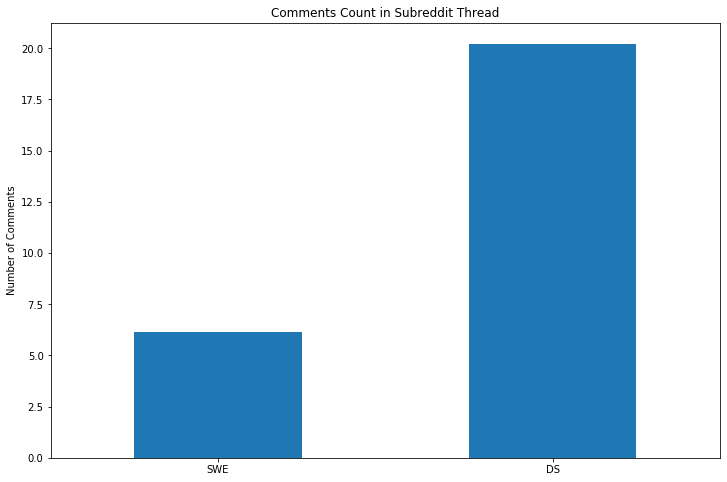

In [27]:
# Comparison of number of columns between swe and dsi posts
plt.figure(figsize=(12,8))
combined_df.groupby('ds').mean()['num_comments'].plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Comments Count in Subreddit Thread')
plt.xticks(ticks=[0, 1], labels=['SWE', 'DS'])
plt.xlabel('')
plt.ylabel('Number of Comments')

Once again, the number of comments in the Data Science subreddit threads are much higher than the number of comments in the Software Engineering subreddit threads. This could be due to a variety of reasons. More importantly, it could also imply that the Data Science subreddit threads have higher engagement with users in general. The high number of comments can also be attributed to the higher number of subscribers in the DS subreddit as compared to the SWE subreddit.

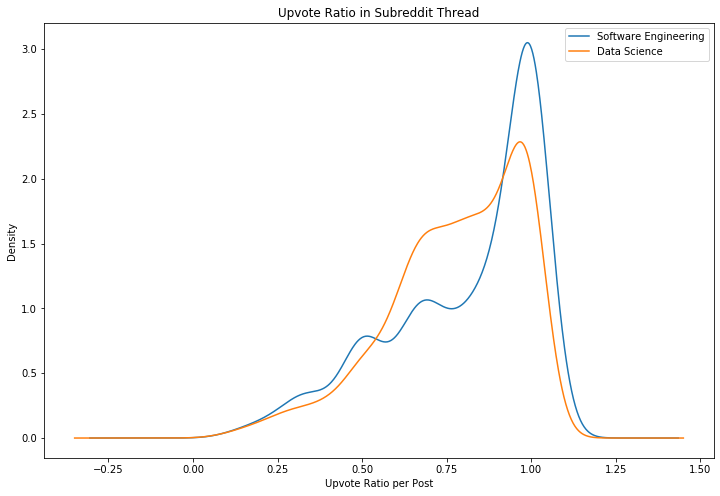

In [28]:
# Comparison of Upvote Ratio between swe and dsi threads
plt.figure(figsize=(12,8))
swe_final['upvote_ratio'].plot.kde(label='Software Engineering')
ds_final['upvote_ratio'].plot.kde(label='Data Science')

plt.xlabel('Upvote Ratio per Post')
plt.title('Upvote Ratio in Subreddit Thread')
plt.legend()

The Upvote Ratio shows the proportion of upvotes and downvotes that a certain post receives. For both subreddits, the most likely upvote ratio per post is = 1 as that is where both plots have the highest density.

## Distribution of Words in Subreddit Threads

Next, I wanted to understand the nature of both Subreddits in terms of the length of posts as well as choice of words used. Hence, I decided to create 2 new columns: `string_count`, that measures the total string length of posts, and `word_count`, that measures the total word count of posts. I will then look at the distributions of these columns across both subreddits.

In [29]:
# Creating a new column to count the len of string
combined_df['string_count'] = combined_df['text'].apply(len)

# Creating a new column to count the number of words
combined_df['word_count'] = combined_df['text'].map(lambda row: len(row.split()))

combined_df.head()

,upvote_ratio,ups,num_comments,subreddit_subscribers,text,ds,string_count,word_count
0,0.72,3,0,24671,Style changes and automoderator Hi /r/Software...,0,617,102
1,0.72,3,10,24671,How do your companies keep track of multiple s...,0,471,72
2,0.76,8,13,24671,How to learn programming fundamentals? I am do...,0,509,87
3,1.00,15,10,24671,Learning to code I’ve been learning to code us...,0,170,28
4,0.57,1,2,24671,Need help regarding Requirements Engineering F...,0,496,82


### Distribution of Strings in Subreddit Threads

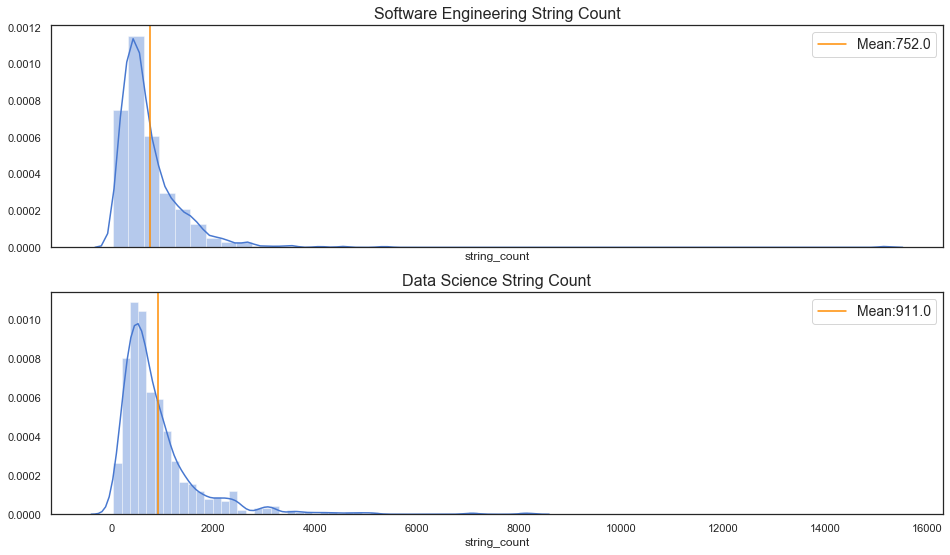

In [30]:
# Distribution of strings
swe_str = combined_df[combined_df['ds']==0]['string_count']
ds_str = combined_df[combined_df['ds']==1]['string_count']

sns.set(style="white", palette="muted", color_codes=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), sharex=True)

# SWE distplot
sns.distplot(swe_str, ax=ax1).axvline(swe_str.mean(), color='darkorange')
ax1.set_title('Software Engineering String Count', fontsize=16)
ax1.legend({f'Mean:{round(swe_str.mean(),0)}':swe_str.mean()}, fontsize=14)

# DS distplot
sns.distplot(ds_str, ax=ax2).axvline(ds_str.mean(), color='darkorange')
ax2.set_title('Data Science String Count', fontsize=16)
ax2.legend({f'Mean:{round(ds_str.mean(),0)}':ds_str.mean()}, fontsize=14);

The average `string_count` for SWE subreddit posts is 752 while the average `string_count` for the DS subreddit posts is 911. Both subreddits have a distribution that is skewed to the right which implies that majority of both posts are not very long-winded.

###  Distribution of Word Count in Subreddit Threads

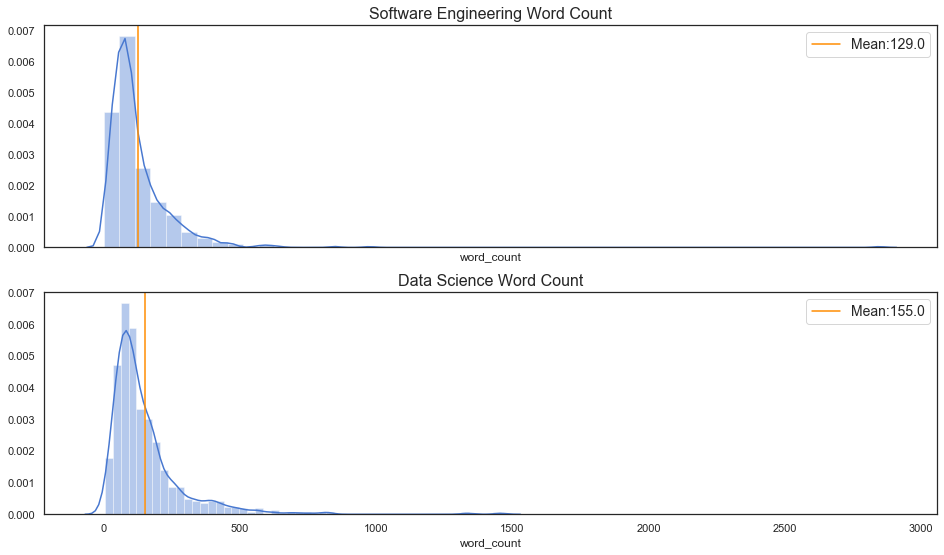

In [31]:
# Distribution of words
swe_word = combined_df[combined_df['ds']==0]['word_count']
ds_word = combined_df[combined_df['ds']==1]['word_count']

sns.set(style="white", palette="muted", color_codes=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), sharex=True)

# SWE distplot
sns.distplot(swe_word, ax=ax1).axvline(swe_word.mean(), color='darkorange')
ax1.set_title('Software Engineering Word Count', fontsize=16)
ax1.legend({f'Mean:{round(swe_word.mean(),0)}':swe_word.mean()}, fontsize=14)

# DS distplot
sns.distplot(ds_word, ax=ax2).axvline(ds_word.mean(), color='darkorange')
ax2.set_title('Data Science Word Count', fontsize=16)
ax2.legend({f'Mean:{round(ds_word.mean(),0)}':ds_word.mean()}, fontsize=14);

The average `word_count` for SWE subreddit posts is 129 words while the average `word_count` for DS subreddit posts is 155 words. Once again, both distributions are also skewed to the right. On average, DS subreddit posts are longer than SWE subreddit posts.

## Pre-Processing

Going back to the 'text' column of our combined_df, we can perform some pre-processing on the text data which will allow us to perform more interesting analysis, modelling and visualizations.

When dealing with text data, there are common pre-processing steps:
    - Tokenizing
    - Regular Expressions
    - Lemmatizing/Stemming
    - Cleaning (Removing stopwords and HTTP etc.)


1. When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern.
2. Regular Expressions, or RegEx, is a helpful tool for detecting patterns in text. 
3. **Lemmatizing** and **stemming** are two forms of shortening words so that we can combine similar forms of the same word. When we "lemmatize" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word. When we "stem" data, we take words and attempt to return a base form of the word. It tends to be cruder than using lemmatization.
4. **Stopwords** are very common words that are often removed because they can amount to unnecessary information and removing them can dramatically speed things up.

### Text Processing

In [32]:
# Overview of text column in dataframe
combined_df['text'].head()

0    Style changes and automoderator Hi /r/Software...
1    How do your companies keep track of multiple s...
2    How to learn programming fundamentals? I am do...
3    Learning to code I’ve been learning to code us...
4    Need help regarding Requirements Engineering F...
Name: text, dtype: object

In [33]:
# Defining a Function to perform Text Processing

def text_processing(raw_text):

    leakage_words = ['software', 'engineering', 'data', 'science', 'http', 'www']

    # Step 1: Remove HTML
    review_text = BeautifulSoup(raw_text).get_text()
    
    # Step 2: Tokenizing - Remove punctuation and convert all text to lowercase
    tokenizer = RegexpTokenizer(r'\w+')
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # Convert all text to lowercase
    words = letters_only.lower().split()
    
    # Step 3: Remove stopwords and leakage words
    words = [word for word in words if word not in stopwords.words('english')+leakage_words]
    
    # Step 4: Stem or lemmatize each word of the text,
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Step 5: Remove any additional stopwords and leakage words that might not have been removed in Step 3
    words = [word for word in words if word not in stopwords.words('english')+leakage_words]
    
    # Return the final string
    return ' '.join(words)

In [34]:
# Creating new df with a new column of cleaned text after performing Text Processing
cleaned_text = combined_df['text'].apply(text_processing)
cleaned_df = combined_df.copy()
cleaned_df['text'] = cleaned_text
cleaned_df['original_text'] = combined_df['text']
cleaned_df.sample(10)

,upvote_ratio,ups,num_comments,subreddit_subscribers,text,ds,string_count,word_count,original_text
43,1.00,19,9,24671,qualiti net core sourc reason look clean day a...,0,863,144,Quality of .net core source - what is the reas...
1095,0.86,10,9,285444,graph matrix matrix triplet import kind inform...,1,2130,346,"Graphs as matrices, matrices as triplets Some ..."
402,1.00,1,1,24671,job market like get job come univers got offer...,0,189,40,Job Market How likely is it to get a job comin...
1240,1.00,1,3,285444,big pictur help project categor supplier name ...,1,1520,252,"Big-Picture Help for Project, Categorizing Sup..."
617,0.86,15,8,24671,return work macbook soon best way backup appli...,0,254,47,I have to return my work Macbook soon. What is...
158,0.50,0,5,24671,ask explain engin non tech person hi everyon i...,0,383,72,[ASK] How you explain what you do as a Softwar...
957,1.00,2,10,285443,top languag ml look transit ml experienc pytho...,1,164,28,Top languages for ML Engineering? I’m looking ...
199,0.95,50,36,24671,wife engin need advic need advic engin perspec...,0,1780,335,Wife of an Engineer needs advice I need some a...
1091,0.91,9,2,285444,anyon use airbnb knowledg repo came across ope...,1,329,44,Has anyone used. the AirBnb knowledge repo? I ...
1206,0.90,15,9,285444,use dissimilar matrix obtain gower distanc eva...,1,1781,196,Using the dissimilarity matrix obtained throug...


In our new cleaned_df, we have created a new column 'text' that includes our processed text after performing tokenization, lemmatization and stemming, as well as removing stopwords and leakage words.

In [35]:
# Saving this cleaned_df into a csv_file
cleaned_df.to_csv('./data/cleaned_data.csv', index = False)

### Train Test Split
Next, we can perform a train test split on our cleaned_df to split the data into train and test datasets for our modelling process. We can also perform data visualizations on the train dataset.

In [36]:
# Assigning the features (X) and target variable (y)
X = cleaned_df['text']
y = cleaned_df['ds']

In [37]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle = True, stratify=y)

In [38]:
# Number of rows in the train set
X_train.shape

(960,)

In [39]:
# Number of rows in the test set
X_test.shape

(321,)

In [40]:
# Proportion of Class 1 and 0
y.value_counts(normalize=True)

0    0.562061
1    0.437939
Name: ds, dtype: float64

In [41]:
# Proportion of Class 1 and 0 in train dataset
y_train.value_counts(normalize=True)

0    0.5625
1    0.4375
Name: ds, dtype: float64

The train data has the same proportion of ds and swe posts as the original dataset because we have used stratification in our train test split. The baseline accuracy is the same at aroud 56.25%, which implies that we will get a Data Science Subreddit post 56.25% of the time. On average, we will get a Data Science Subreddit post from our dataset.

In [42]:
# Overview of X_train
X_train

1228    project got first job self taught prove knowle...
590     maintain object across api deploy instanc work...
654     elect choos head path hi c major colleg offer ...
65      event sourc azur part architectur plan hi post...
980     import r industri day current transit field r ...
                              ...                        
302     visual thread profil visual thread profil see ...
1263    scientist seen better smarter analyst studi bc...
1150    pre meet idol panic huge footbal statist nerd ...
314     build experi help land first job hello qualifi...
572     aw tutori ex aw engin interest x post r webdev...
Name: text, Length: 960, dtype: object

In [43]:
# Overview of y_train
y_train

1228    1
590     0
654     0
65      0
980     1
       ..
302     0
1263    1
1150    1
314     0
572     0
Name: ds, Length: 960, dtype: int64

## Data Visualization

### CountVectorizer

To perform data analysis and visualizations on the text column of the dataframe, we have to use `CountVectorizer` to transform the lists of cleaned reviews into features that go into a model. `CountVectorizer` first counts up how many times a token (word) is observed in a given post and next creates a column that stores these counts.

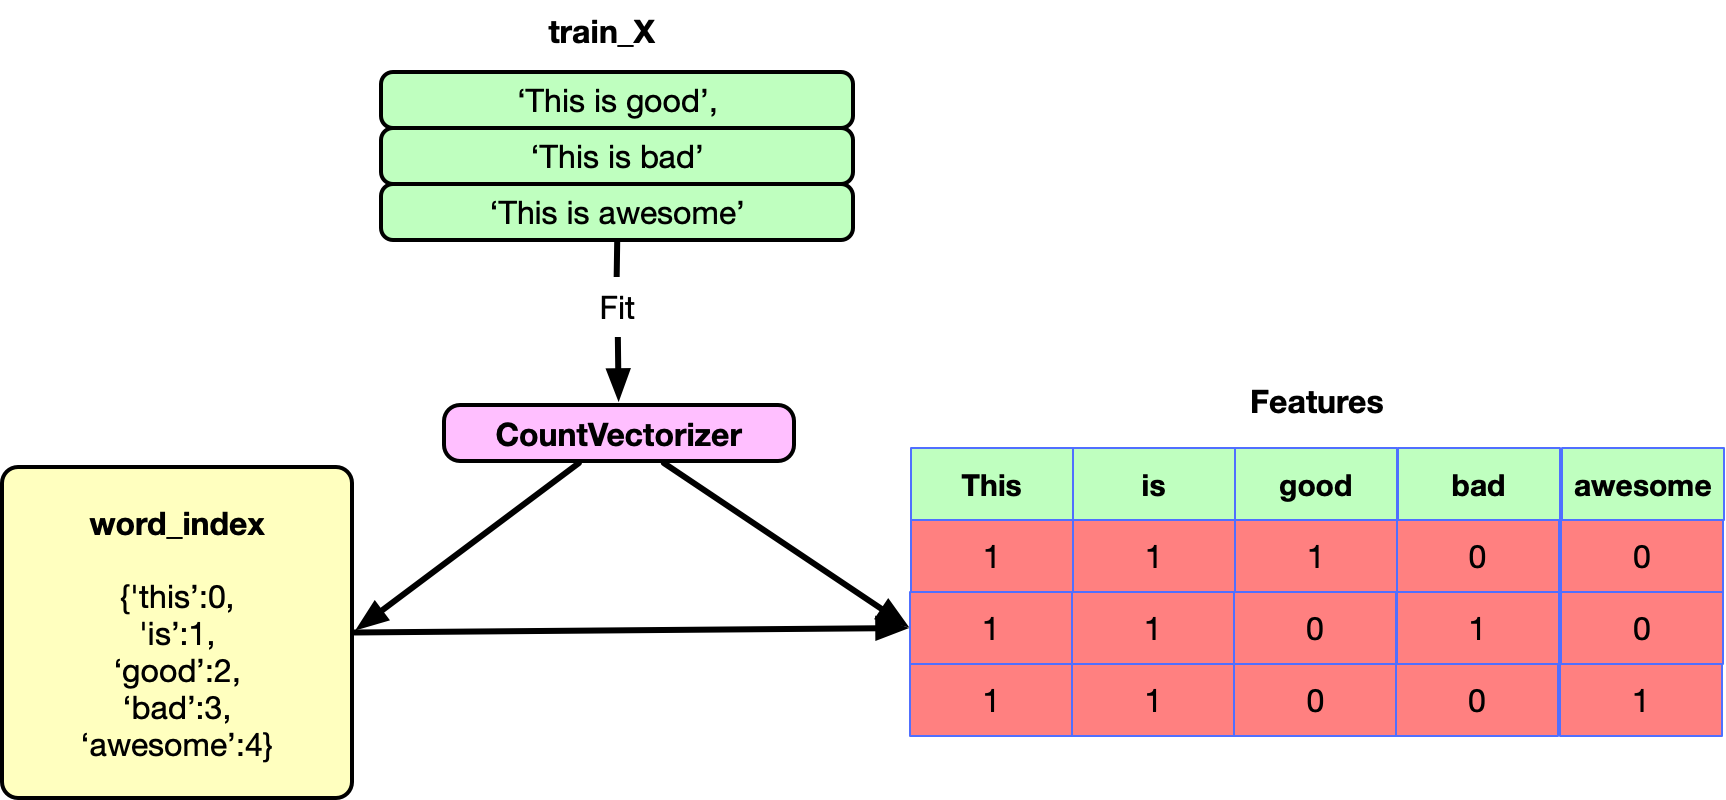
<img src="https://github.com/dominiczrong/dsiprojects/blob/master/project_3/images/wordcloud_ds.png" width="600" height="400"/>

<img src="https://github.com/dominiczrong/dsiprojects/blob/master/project_3/images/countvectorizer.png" width="600" height="400"/>

### Most Common Words for Software Engineering Subreddit

In [44]:
# Number of SWE Posts in the combined cleaned df
swe_text = cleaned_df[cleaned_df['ds'] == 0]['text']
swe_text.shape

(720,)

In [45]:
# Number of SWE Posts in the X_train data set
swe_train = pd.merge(X_train, swe_text, how='inner', on=['text'])
print(swe_train.shape)
swe_train

(540, 1)


,text
0,maintain object across api deploy instanc work...
1,elect choos head path hi c major colleg offer ...
2,event sourc azur part architectur plan hi post...
3,technic interview suck le technic interview al...
4,someon know valuabl engin therebi employ mean ...
...,...
535,advic dashboard two separ sql databas guy advi...
536,gather knowledg good way start work develop ag...
537,visual thread profil visual thread profil see ...
538,build experi help land first job hello qualifi...


From our train dataset which has 960 rows of posts, 540 of those rows are from the SWE subreddit. The remaining 420 rows are from the DS subreddit.

In [46]:
# Let's use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words='english')

# Fit our vectorizer into our software engineering posts in our X_train
cvec.fit(swe_train['text'])

# Total number of features (words) in Software Engineering posts in X_train
print('Number of features without stop words: {}'.format(len(cvec.get_feature_names())))

Number of features without stop words: 2007


In [47]:
# Transforming using our fitted cvec and converting the result to a DataFrame
swe_words = pd.DataFrame(cvec.transform(swe_train['text']).todense(),
                       columns=cvec.get_feature_names())

In [48]:
# Overview of vectorized table of words
swe_words.head()

,aa,abil,abl,abroad,absolut,abstract,ac,academ,accept,access,accomplish,accord,account,accumul,accur,ace,achiev,acquaint,acquir,act,action,activ,actual,ad,adapt,add,addit,address,adevait,adjust,admin,administr,admit,adob,adopt,advanc,advantag,advertis,advic,advis,advisor,ae,aerospac,affect,afford,afterward,age,agenda,agent,aggreg,agil,ago,agplv,agre,agreement,ah,ai,aim,air,albeit,aleksandarskrb,algebra,algo,algorithm,alienwar,align,allow,alon,alot,alreadi,altern,alway,amaz,amazon,amp,amsterdam,analysi,analyst,analyt,analyz,android,angl,angular,anim,annoy,anonym,anoth,answer,anti,anxieti,anxiou,anybodi,anymor,anyon,anyth,anywher,ap,apach,apart,api,app,appar,appeal,appear,append,appl,appli,applic,appreci,approach,appropri,approxim,ar,arbitrari,architect,architectur,area,argu,argument,array,art,articl,artifici,asap,asia,asid,ask,asp,aspect,aspir,assembl,assert,asset,assign,assist,associ,assum,assumpt,asynchron,atleast,atom,attach,attempt,attend,attent,attract,audio,august,auth,authent,author,auto,autom,automat,automot,avail,averag,avoid,aw,awar,away,awesom,azur,ba,bachelor,backend,background,backstori,backup,bad,bake,balanc,bank,bar,bare,barrier,base,baselin,bash,basi,basic,bay,bc,becam,becom,begin,beginn,begun,behalf,believ,bell,belt,benefit,besid,best,better,bia,big,bigger,biggest,binari,bit,black,blind,blob,block,blockchain,blog,bo,board,bodi,bonu,book,boolean,boot,bootcamp,bore,bother,bottleneck,bought,bounc,bound,box,brain,branch,break,breath,bridg,brief,briefli,bring,broad,broken,broker,brought,brows,browser,budget,bug,build,built,bunch,burden,burnout,busi,button,buy,bypass,ca,cach,calcul,calculu,came,camera,camp,campaign,canada,cancel,candid,capabl,card,care,career,carri,case,catch,categori,caught,caus,cc,cd,ce,center,central,centuri,ceo,certain,certif,ch,challeng,chanc,chang,channel,charg,chart,chat,chatroom,cheap,cheat,check,chemic,child,choic,choos,chosen,chunk,ci,citi,claim,class,classic,classifi,classmat,clean,clear,clearli,cli,click,client,climb,close,cloud,club,code,codebas,codecademi,cognit,collabor,colleagu,collect,collector,colleg,color,com,combin,come,comfort,command,comment,commit,common,commun,commut,comp,compani,compar,comparison,compens,compet,compil,complet,complex,complic,compos,composit,comput,concentr,concept,conceptu,concern,concret,concurr,condit,conduct,confid,configur,confirm,conflict,confus,connect,consequ,consid,consider,consist,consol,constantli,construct,constructor,consult,consum,contact,contain,contempl,content,context,continu,contract,contradict,contrast,contribut,control,controversi,convent,convers,convert,conveyor,convinc,cool,cope,copi,core,corner,correct,correctli,cost,count,countri,coupl,cours,coursera,cover,coverag,covid,cowork,cqr,cr,crack,crap,crash,crazi,creat,creation,creativ,credit,critic,critiqu,cross,cs,cultur,curiou,currenc,current,curriculum,curv,custom,cut,cv,cyber,cybersecur,cycl,dad,daili,dark,dashboard,databas,datadog,date,daunt,day,db,dc,dd,ddd,dead,deadlin,deal,dear,death,debt,debug,decad,decent,decid,decis,dedic,deep,def,default,defin,definit,degre,deliv,deliveri,dell,demand,demo,deni,depend,deploy,depress,depth,describ,descript,deserv,design,desk,desktop,desper,despit,destroy,detect,dev,develop,devic,devop,devtool,df,diagram,differ,differenti,difficult,difficulti,digit,dilemma,direct,directli,director,disabl,disagre,...,result,resum,return,reveal,revenu,revers,review,rewrit,right,ring,rise,risk,road,roadmap,robert,robot,robust,role,room,root,rot,roughli,rout,routin,row,rpv,rubi,ruin,rule,run,rust,rusti,saa,sad,sadli,safe,said,salari,sale,sampl,satisfi,save,saw,say,scalabl,scale,scare,scenario,schedul,schema,school,sci,scienc,scientist,scope,score,scratch,screen,script,scroll,scrum,sde,sdk,sdlc,se,seamlessli,search,second,section,secur,seek,seen,select,self,sell,seller,semest,send,senior,sens,sent,separ,septemb,sequenc,serf,seri,seriou,serv,server,servic,set,setup,sever,sf,shall,shape,share,sharpen,shed,shift,ship,shit,short,shot,shoulder,shown,shut,sick,sight,sign,signif

In [49]:
# Finding the top 100 words that frequently appeared in software engineering subreddits based on our training set
swe_top = swe_words.sum(axis = 0).sort_values(ascending = False).head(100)
swe_top

work       415
develop    329
like       304
engin      289
code       275
          ... 
offer       55
studi       55
come        55
user        54
thought     54
Length: 100, dtype: int64

In [50]:
# Name of Top 100 most frequent Features/Columns
swe_pd = pd.DataFrame(data=swe_top)
swe_pd.index

Index(['work', 'develop', 'like', 'engin', 'code', 'use', 'job', 'year',
       'learn', 'time', 'want', 'know', 'project', 'compani', 'think', 'start',
       'look', 'need', 'make', 'help', 'thing', 'thank', 'program', 'good',
       'realli', 'experi', 'com', 'career', 'way', 'comput', 'feel', 'peopl',
       'degre', 'new', 'app', 'tri', 'current', 'differ', 'lot', 'question',
       'chang', 'idea', 'someth', 'manag', 'colleg', 'best', 'anyon', 'team',
       'test', 'guy', 'skill', 'cours', 'hi', 'interview', 'advic', 'class',
       'month', 'problem', 'requir', 'end', 'build', 'got', 'ask', 'product',
       'applic', 'write', 'python', 'design', 'languag', 'industri', 'becom',
       'someon', 'say', 'better', 'commun', 'sourc', 'wonder', 'post',
       'servic', 'sinc', 'school', 'day', 'web', 'abl', 'run', 'appli',
       'pleas', 'sure', 'possibl', 'mani', 'read', 'creat', 'knowledg', 'java',
       'univers', 'offer', 'studi', 'come', 'user', 'thought'],
      dtype='objec

In [51]:
# Filtering out the top 100 words/columns
swe_top = swe_words[swe_pd.index]
swe_top.head()

,work,develop,like,engin,code,use,job,year,learn,time,want,know,project,compani,think,start,look,need,make,help,thing,thank,program,good,realli,experi,com,career,way,comput,feel,peopl,degre,new,app,tri,current,differ,lot,question,chang,idea,someth,manag,colleg,best,anyon,team,test,guy,skill,cours,hi,interview,advic,class,month,problem,requir,end,build,got,ask,product,applic,write,python,design,languag,industri,becom,someon,say,better,commun,sourc,wonder,post,servic,sinc,school,day,web,abl,run,appli,pleas,sure,possibl,mani,read,creat,knowledg,java,univers,offer,studi,come,user,thought
0,2,1,3,0,0,1,0,0,2,2,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,0,1,0,2,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Word Cloud of Most Common Words in Sofware Engineering Subreddits

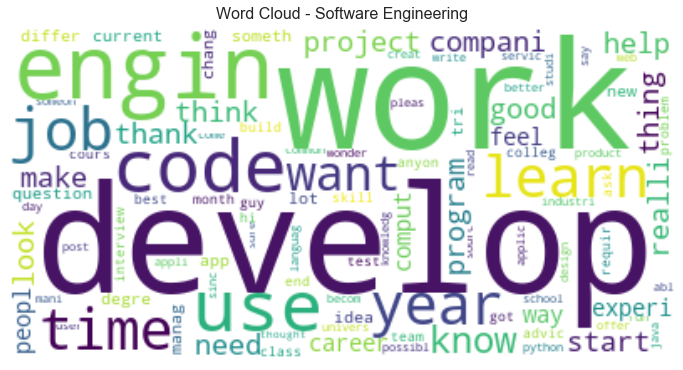

In [52]:
# Generate Word Cloud
wordcloud_swe = WordCloud(background_color="white").generate(' '.join(swe_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_swe, interpolation='bilinear')
plt.title('Word Cloud - Software Engineering', fontsize=16, y=1.01)
plt.axis("off");

In [53]:
# Which words appear the most in Software Engineering Subreddit Posts?
word_counts = swe_words.sum(axis=0)
print("Most common words in Software Engineering Subreddits")
word_counts.sort_values(ascending = False).head(20)

Most common words in Software Engineering Subreddits


work       415
develop    329
like       304
engin      289
code       275
use        261
job        236
year       233
learn      232
time       228
want       223
know       223
project    183
compani    182
think      181
start      174
look       170
need       168
make       162
help       155
dtype: int64

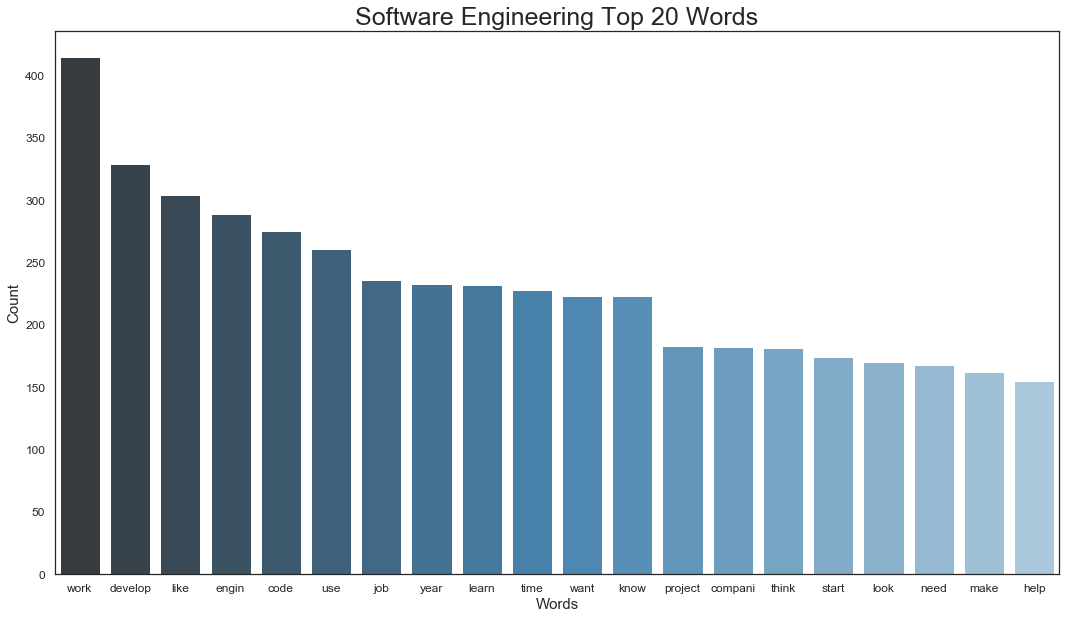

In [54]:
# Visualization of most common words in software engineering subreddits
swe_top_20 = pd.DataFrame(word_counts.sort_values(ascending = False).head(20), columns=['count'])
plt.figure(figsize=(18,10))
sns.barplot(swe_top_20.index, 'count', data=swe_top_20, palette='Blues_d')
plt.title('Software Engineering Top 20 Words', fontsize=25)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=12)

### Most Common Words for Data Science Subreddit

In [55]:
# Number of DS Posts in the combined cleaned df
ds_text = cleaned_df[cleaned_df['ds'] == 1]['text']
ds_text.shape

(561,)

In [56]:
# Number of SWE Posts in the X_train data set
ds_train = pd.merge(X_train, ds_text, how='inner', on=['text'])
print(ds_train.shape)
ds_train

(420, 1)


,text
0,project got first job self taught prove knowle...
1,import r industri day current transit field r ...
2,tool method optim work larg set hello everybod...
3,work life balanc week anyon fluctuat schedul s...
4,analyst sciencey thing scientist yet hi gang b...
...,...
415,mckinsey oa thought anybodi recent oa mckinsey...
416,impost syndrom realli seem know anyth month so...
417,asa v inform current member asa work industri ...
418,scientist seen better smarter analyst studi bc...


In [57]:
# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words='english')

# Fit our vectorizer into our data science posts in our dataframe
cvec.fit(ds_train['text'])

# Total number of features (words) in Data Science Subreddit posts in our X_train
print('Number of features without stop words: {}'.format(len(cvec.get_feature_names())))

Number of features without stop words: 2021


In [58]:
# Transforming using our fitted cvec and converting the result to a DataFrame
ds_words = pd.DataFrame(cvec.transform(ds_train['text']).todense(),
                       columns=cvec.get_feature_names())

In [59]:
# Finding the top 100 words that frequently appeared in data science subreddits
ds_top = ds_words.sum(axis = 0).sort_values(ascending = False).head(100)
ds_top

work        409
use         388
like        292
model       229
job         224
           ... 
person       52
everyon      52
github       52
run          51
knowledg     51
Length: 100, dtype: int64

In [60]:
# Name of Top 100 most frequent Features/Columns
ds_pd = pd.DataFrame(data=ds_top)
ds_pd.index

Index(['work', 'use', 'like', 'model', 'job', 'learn', 'scientist', 'want',
       'know', 'compani', 'time', 'look', 'project', 'think', 'question',
       'need', 'year', 'help', 'python', 'make', 'featur', 'realli', 'code',
       'thank', 'problem', 'start', 'tri', 'current', 'peopl', 'experi',
       'anyon', 'new', 'analyst', 'feel', 'good', 'com', 'differ', 'best',
       'ask', 'tool', 'way', 'cours', 'team', 'manag', 'thing', 'posit',
       'build', 'skill', 'analyt', 'product', 'lot', 'dataset', 'set', 'busi',
       'role', 'test', 'understand', 'hi', 'right', 'better', 'someth',
       'master', 'career', 'math', 'machin', 'predict', 'analysi', 'appli',
       'base', 'point', 'idea', 'program', 'import', 'valu', 'industri', 'day',
       'sql', 'sure', 'field', 'ml', 'row', 'thought', 'result', 'basic',
       'level', 'advic', 'creat', 'come', 'gener', 'engin', 'sinc', 'statist',
       'post', 'mani', 'wonder', 'person', 'everyon', 'github', 'run',
       'knowledg'],
 

In [61]:
# Filtering out the top 100 words/columns
ds_top = ds_words[ds_pd.index]
ds_top.head()

,work,use,like,model,job,learn,scientist,want,know,compani,time,look,project,think,question,need,year,help,python,make,featur,realli,code,thank,problem,start,tri,current,peopl,experi,anyon,new,analyst,feel,good,com,differ,best,ask,tool,way,cours,team,manag,thing,posit,build,skill,analyt,product,lot,dataset,set,busi,role,test,understand,hi,right,better,someth,master,career,math,machin,predict,analysi,appli,base,point,idea,program,import,valu,industri,day,sql,sure,field,ml,row,thought,result,basic,level,advic,creat,come,gener,engin,sinc,statist,post,mani,wonder,person,everyon,github,run,knowledg
0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,6,1,1,5,2,3,0,0,0,0,0,0,1,0,1,1,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,2,3,0,1,0,0,0,1,0,0,3,0,1,1,1,1,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,2,0,0,0
3,4,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Word Cloud of Most Common Words in Data Science Subreddit

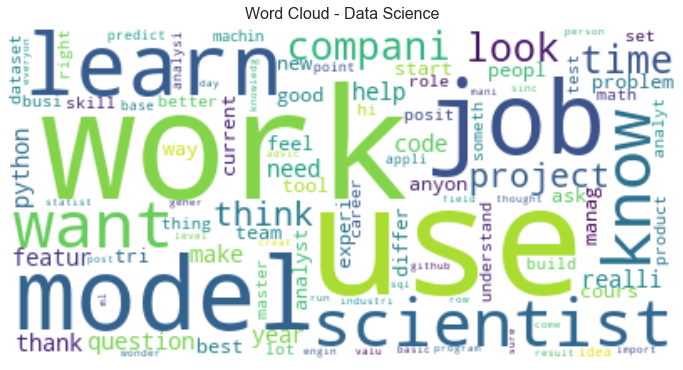

In [62]:
# Generate Word Cloud
wordcloud_ds = WordCloud(background_color="white").generate(' '.join(ds_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_ds, interpolation='bilinear')
plt.title('Word Cloud - Data Science', fontsize=16, y=1.01)
plt.axis("off");

In [63]:
# Which words appear the most in data science subreddits in our X_train?
word_counts = ds_words.sum(axis=0)
print("Most common words in Data Science Subreddits")
word_counts.sort_values(ascending = False).head(20)

Most common words in Data Science Subreddits


work         409
use          388
like         292
model        229
job          224
learn        219
scientist    194
want         183
know         182
compani      180
time         159
look         158
project      143
think        133
question     132
need         131
year         131
help         129
python       128
make         121
dtype: int64

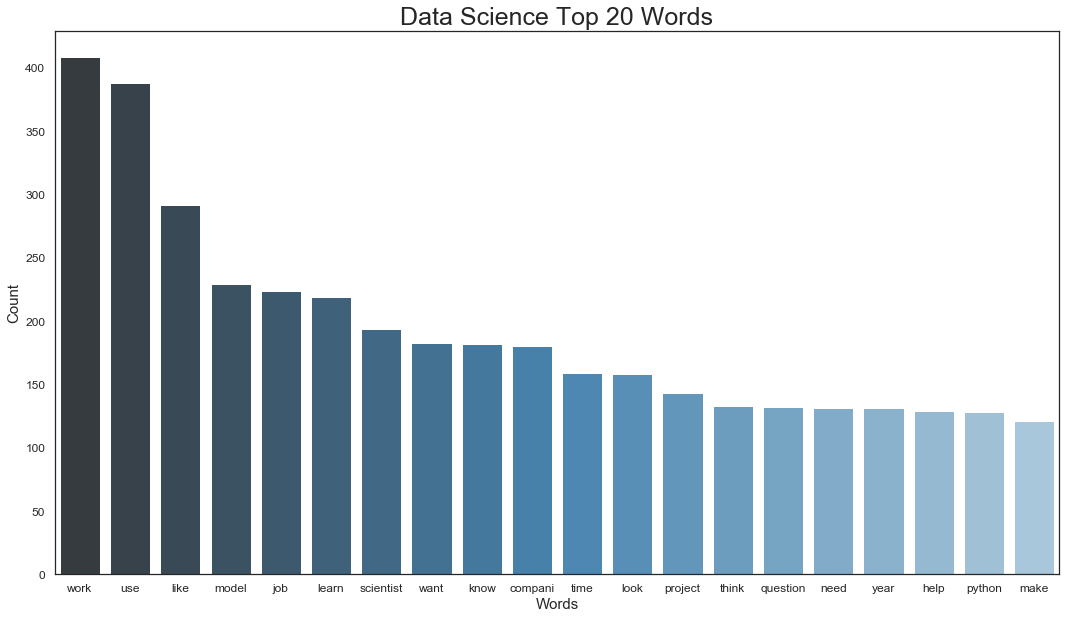

In [64]:
# Visualization of most common words in data science Subreddits
ds_top_20 = pd.DataFrame(word_counts.sort_values(ascending = False).head(20), columns=['count'])
plt.figure(figsize=(18,10))
sns.barplot(ds_top_20.index, 'count', data=ds_top_20, palette='Blues_d')
plt.title('Data Science Top 20 Words', fontsize=25)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=12)

### Comparing Most Common Words across SWE and DSI Subreddit Posts

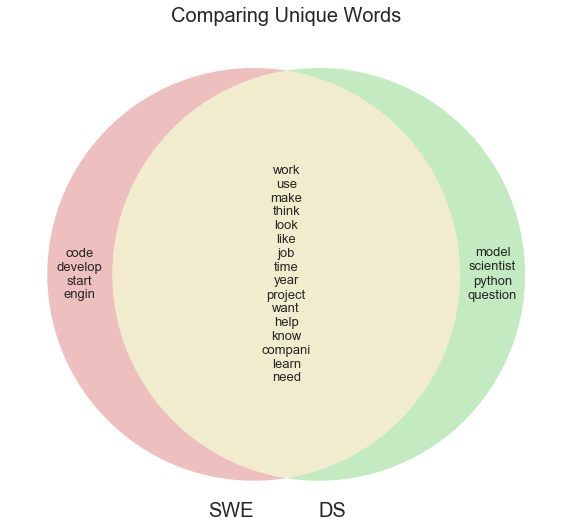

In [65]:
plt.figure(figsize=(10,10))
plt.title('Comparing Unique Words',fontsize=20)

set_a = set(swe_top_20.index)
set_b = set(ds_top_20.index)

venn = venn2([set_a,set_b],set_labels=['SWE','DS'])
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

venn.get_label_by_id('A').set_size(20)
venn.get_label_by_id('B').set_size(20)
venn.get_label_by_id('100').set_size(13)
venn.get_label_by_id('110').set_size(13)
venn.get_label_by_id('010').set_size(13)

The words that are unique in software engineering subreddit posts include: `start`, `develop`, `code`, `engin` whiile the words that are unique in data science subreddit posts include: `scientist`, `question`, `model`, `python`.

In [66]:
# Comparison of Top 20 Common Words in Both Subreddits
swe_top_20['swe_count'] = swe_top_20['count']
swe_top_20 = swe_top_20['swe_count']
ds_top_20['ds_count'] = ds_top_20['count']
ds_top_20 = ds_top_20['ds_count']
combined_top = pd.concat([swe_top_20, ds_top_20], axis = 1, sort = False)
combined_top

,swe_count,ds_count
work,415.0,409.0
develop,329.0,NaN
like,304.0,292.0
engin,289.0,NaN
code,275.0,NaN
use,261.0,388.0
job,236.0,224.0
year,233.0,131.0
learn,232.0,219.0
time,228.0,159.0


Text(0, 0.5, 'Count')

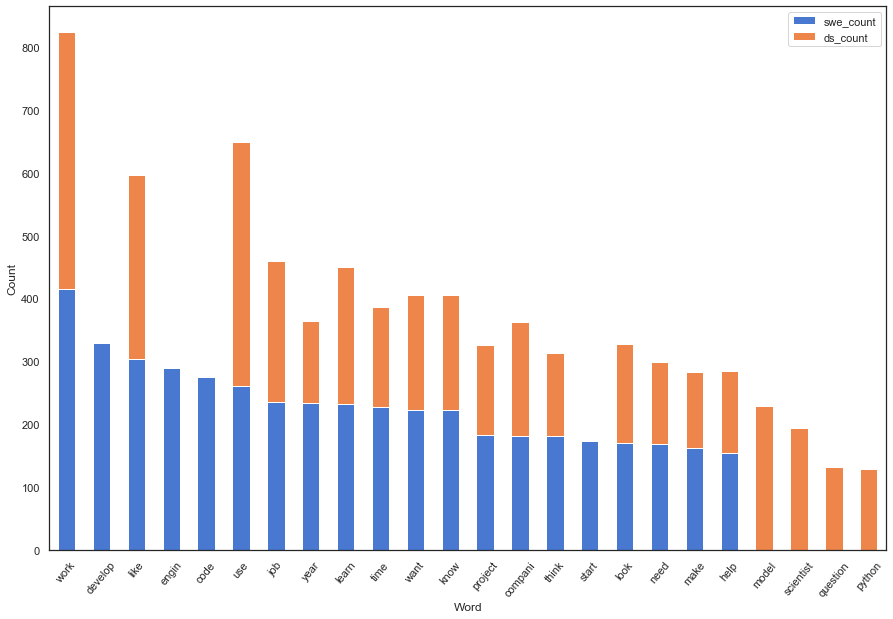

In [67]:
# Stacked bar plot of top 20 words in both subreddits
combined_top.plot.bar(stacked = True, figsize = (15,10))
plt.xticks(rotation = 50)
plt.xlabel('Word')
plt.ylabel('Count')

Looking at the most common words (top 20) across both subreddits, it is evident that many words appear across both types of subreddits, for example: `work`, `use`, `,job`, `learn`, `project`, `think`. Such words are more reflective on the similar nature of both subreddits that are focused on such job careers. Unique words like `model`, `scientist`, `question` and `python` in data science subreddits are very reflective of the nature of the job scope of data scientists. On the other hand, unique words like `develop`, `engin`, `code`, `start` are reflective of the nature of the job scope of software engineers.

## Modelling

For our modelling attempts, we will only be considering the 'text' column of our dataset, which has been cleaned and processed, as the only feature. This is because we are trying to train our model based solely on the text content of a subreddit post. Thus, our model should be able to perform the classification based only on the text from the 'title' and 'selftext' columns.

 For our modelling, we will be using both the `CountVectorizer` and `TfidVectorizer` and the following models: `MultinomialNB`, `KNeighborsClassifier`, `RandomForestClassifier`, `LogisticRegression` and `SupportVectorMachines`.

### 1. Naive Bayes -  MultinomialNB

The Naive Bayes classification algorithm is a classification modelling technique that relies on Bayes Theorem and assumes that our features are independent of one another. The advantage of making such an assumption is that it makes it easier to calcualte probabilities but it is incredibly unrealistic especially in the case of text data. Whiile our classiciations might be accurate, our predicted probabilities will usually be quite bad. In particular, we will be using the `MultinomialNB` model in this case.

#### Using the CountVectorizer Transformer

In [68]:
# CountVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and MultinomialNB (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': np.linspace(0, 1, 5)
}

In [69]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.7min finished


{'cvec__max_df': 0.6,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'nb__alpha': 0.25}

In [70]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
nb_cvec_tn = tn
print("True Negatives: %s" % nb_cvec_tn)
nb_cvec_fp = fp
print("False Positives: %s" % nb_cvec_fp)
nb_cvec_fn = fn
print("False Negatives: %s" % nb_cvec_fn)
nb_cvec_tp = tp
print("True Positives: %s" % nb_cvec_tp)
print('\n')

# Print Training and Testing Accuracy
nb_cvec = gs.best_estimator_
print('Training Accuracy: ', nb_cvec.score(X_train, y_train))
print('Testing Accuracy: ', nb_cvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
nb_cvec_sens = round(tp / (tp + fn),2)
nb_cvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", nb_cvec_sens)
print("Specificity: ", nb_cvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 167                  13
Actual positive                  23                 118


True Negatives: 167
False Positives: 13
False Negatives: 23
True Positives: 118


Training Accuracy:  0.9510416666666667
Testing Accuracy:  0.8878504672897196


Sensitivity:  0.84
Specificity:  0.93


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       180
           1       0.90      0.84      0.87       141

    accuracy                           0.89       321
   macro avg       0.89      0.88      0.89       321
weighted avg       0.89      0.89      0.89       321

------------------------------------------------------------


#### Using the TFIDFVectorizer Transformer

- **TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.**
- Variations of the TF-IDF score are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

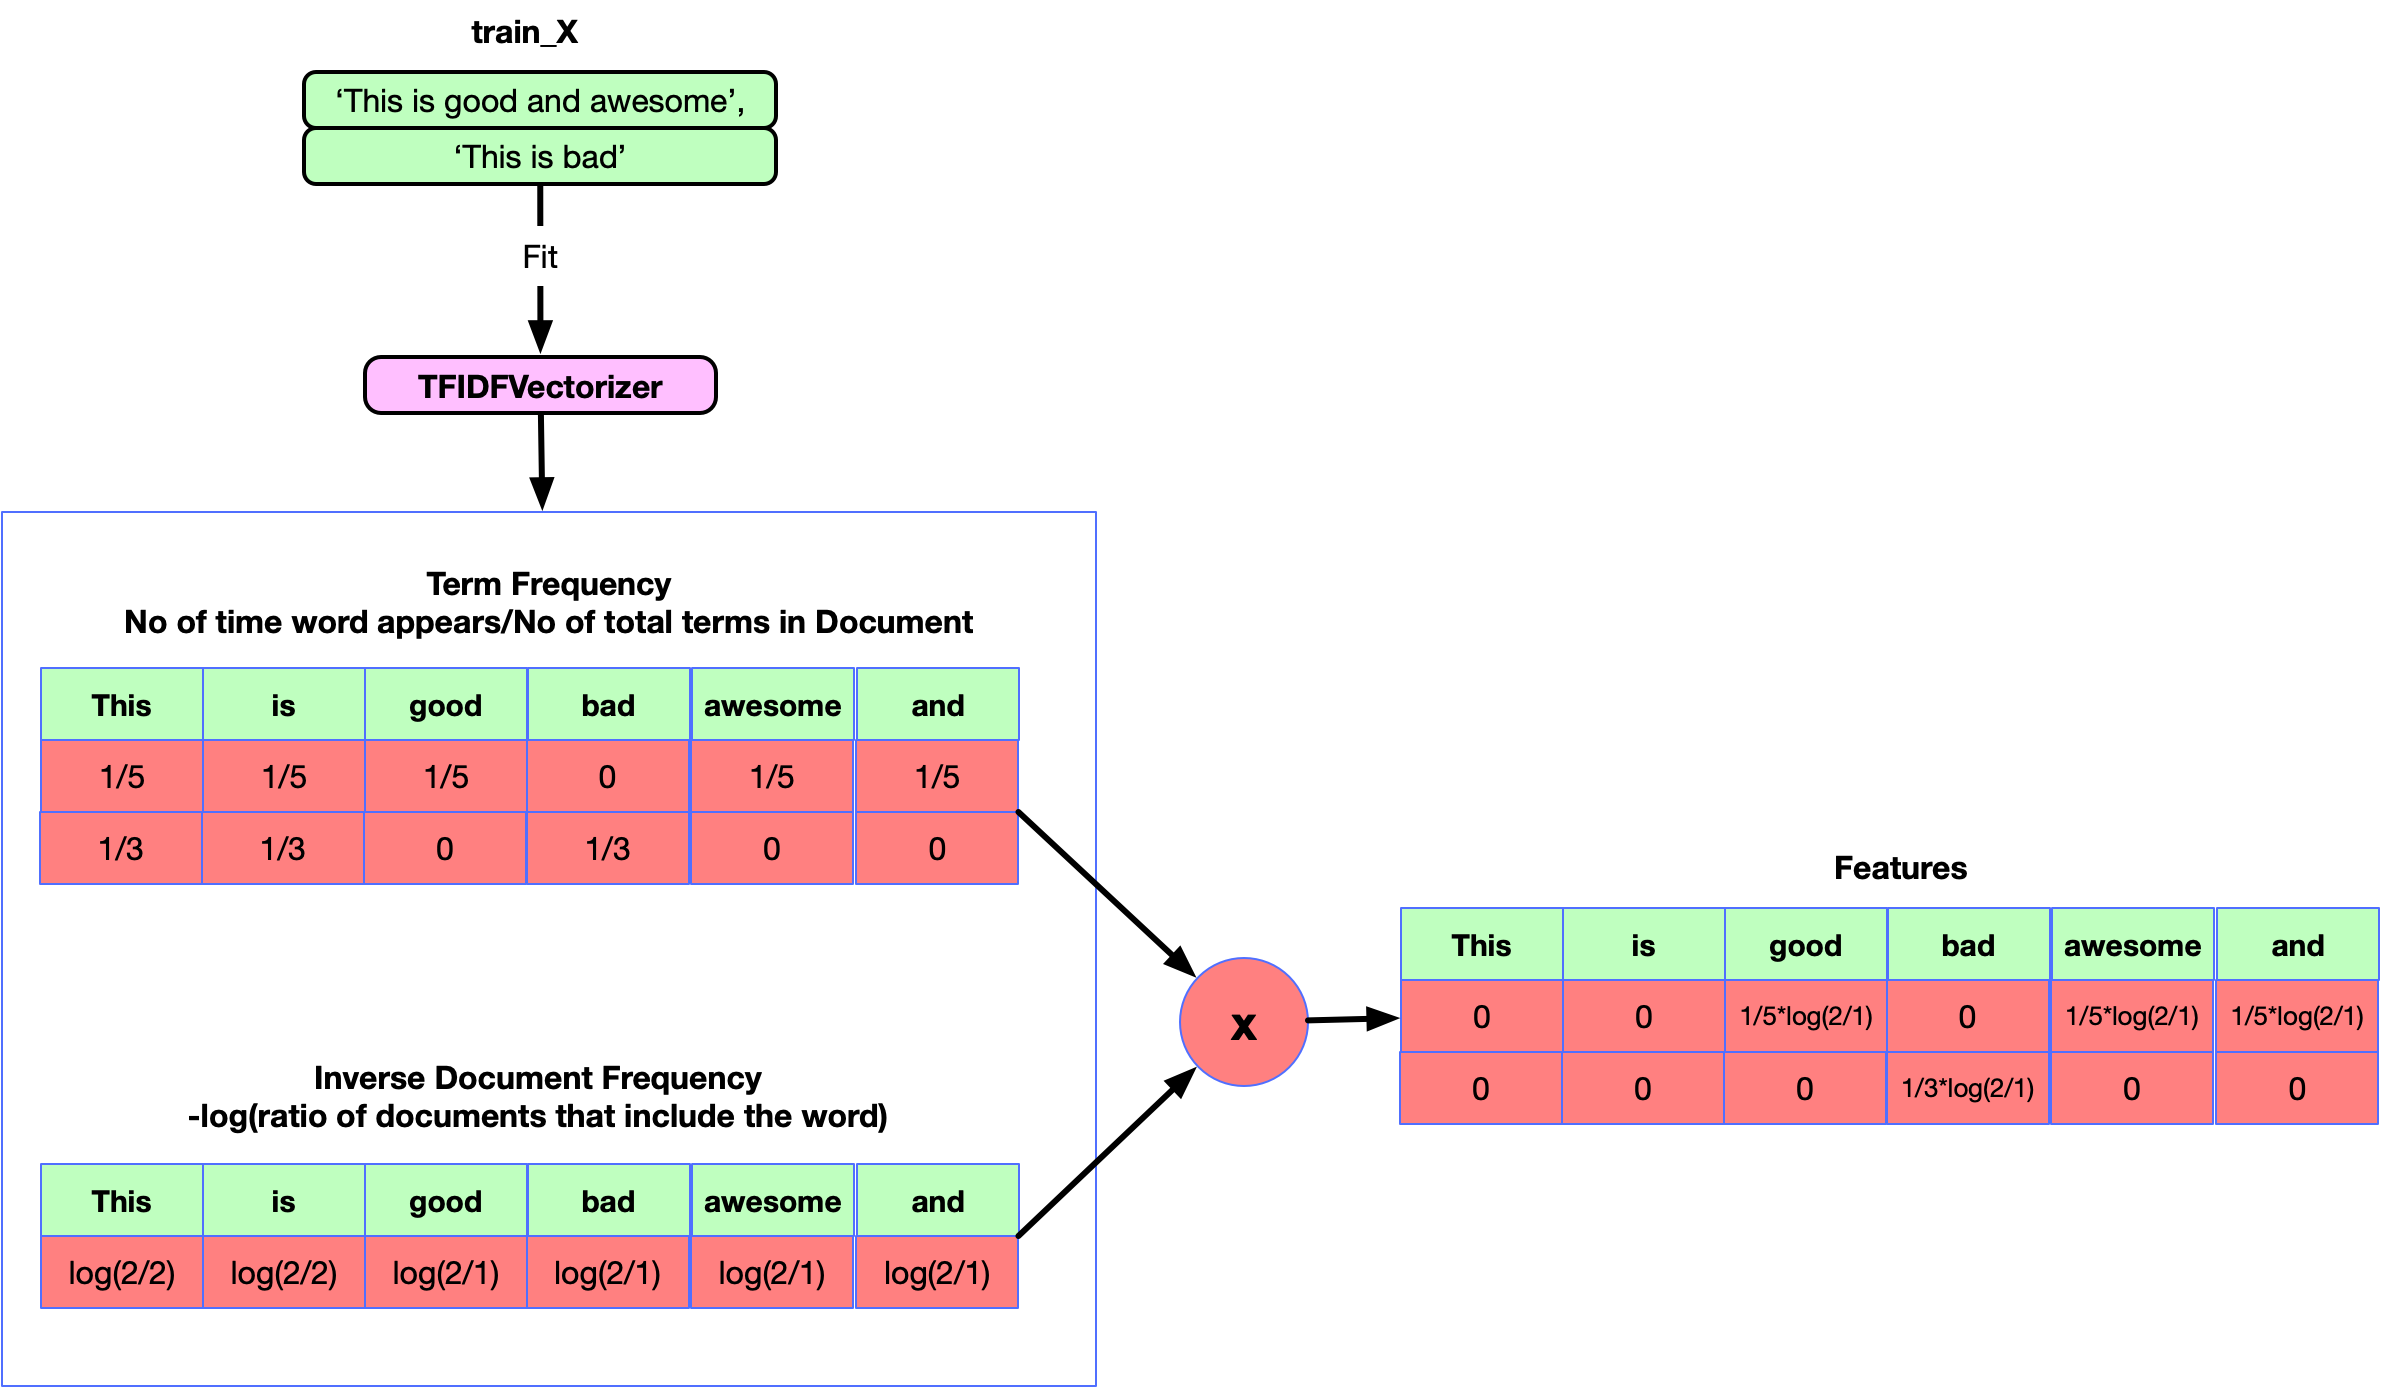

In [71]:
# TFIDFVectorizer

# Setting up a Pipeline with TFIDFVectorizer (Transformer) and MultinomialNB (Estimator)
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Search over the following values of hyperparameters
pipe_params = {
    'tvec__max_features': [1500, 2000, 2200],
    'tvec__max_df': [0.4, 0.6, 0.9],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': np.linspace(0, 1, 5)
}

In [72]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1294 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.7min finished


{'nb__alpha': 0.25,
 'tvec__max_df': 0.6,
 'tvec__max_features': 2200,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [73]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
nb_tvec_tn = tn
print("True Negatives: %s" % nb_tvec_tn)
nb_tvec_fp = fp
print("False Positives: %s" % nb_tvec_fp)
nb_tvec_fn = fn
print("False Negatives: %s" % nb_tvec_fn)
nb_tvec_tp = tp
print("True Positives: %s" % nb_tvec_tp)
print('\n')

# Print Training and Testing Accuracy
nb_tvec = gs.best_estimator_
print('Training Accuracy: ', nb_tvec.score(X_train, y_train))
print('Testing Accuracy: ', nb_tvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
nb_tvec_sens = round(tp / (tp + fn),2)
nb_tvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", nb_tvec_sens)
print("Specificity: ", nb_tvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 170                  10
Actual positive                  43                  98


True Negatives: 170
False Positives: 10
False Negatives: 43
True Positives: 98


Training Accuracy:  0.953125
Testing Accuracy:  0.8348909657320872


Sensitivity:  0.7
Specificity:  0.94


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.80      0.94      0.87       180
           1       0.91      0.70      0.79       141

    accuracy                           0.83       321
   macro avg       0.85      0.82      0.83       321
weighted avg       0.85      0.83      0.83       321

------------------------------------------------------------


### 2. Logistic Regression

Logistic regression is the most common binary classification algorithm. It will predict continuous probabilities between 0 and 1.

#### Using the CountVectorizer Transformer

In [74]:
# CountVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and Logistic Regression (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear', random_state = 42))
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__C': [1, 0.5, 0.1]
}

In [75]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  3.0min finished


{'cvec__max_df': 0.6,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__C': 0.5,
 'lr__penalty': 'l1'}

In [76]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
lr_cvec_tn = tn
print("True Negatives: %s" % lr_cvec_tn)
lr_cvec_fp = fp
print("False Positives: %s" % lr_cvec_fp)
lr_cvec_fn = fn
print("False Negatives: %s" % lr_cvec_fn)
lr_cvec_tp = tp
print("True Positives: %s" % lr_cvec_tp)
print('\n')

# Print Training and Testing Accuracy
lr_cvec = gs.best_estimator_
print('Training Accuracy: ', lr_cvec.score(X_train, y_train))
print('Testing Accuracy: ', lr_cvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
lr_cvec_sens = round(tp / (tp + fn),2)
lr_cvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", lr_cvec_sens)
print("Specificity: ", lr_cvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 162                  18
Actual positive                  24                 117


True Negatives: 162
False Positives: 18
False Negatives: 24
True Positives: 117


Training Accuracy:  0.9708333333333333
Testing Accuracy:  0.8691588785046729


Sensitivity:  0.83
Specificity:  0.9


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       180
           1       0.87      0.83      0.85       141

    accuracy                           0.87       321
   macro avg       0.87      0.86      0.87       321
weighted avg       0.87      0.87      0.87       321

------------------------------------------------------------


#### Using the TFIDFVectorizer Transformer

In [77]:
# TFIDFVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and Logistic Regression (Estimator)
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear', random_state = 42))
])

# Search over the following values of hyperparameters
pipe_params = {
    'tvec__max_features': [1500, 2000, 2200],
    'tvec__max_df': [0.4, 0.6, 0.9],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__C': [1, 0.5, 0.1]
}

In [78]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2406 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  2.8min finished


{'lr__C': 1,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.6,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [79]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
lr_tvec_tn = tn
print("True Negatives: %s" % lr_tvec_tn)
lr_tvec_fp = fp
print("False Positives: %s" % lr_tvec_fp)
lr_tvec_fn = fn
print("False Negatives: %s" % lr_tvec_fn)
lr_tvec_tp = tp
print("True Positives: %s" % lr_tvec_tp)
print('\n')

# Print Training and Testing Accuracy
lr_tvec = gs.best_estimator_
print('Training Accuracy: ', lr_tvec.score(X_train, y_train))
print('Testing Accuracy: ', lr_tvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
lr_tvec_sens = round(tp / (tp + fn),2)
lr_tvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", lr_tvec_sens)
print("Specificity: ", lr_tvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 173                   7
Actual positive                  34                 107


True Negatives: 173
False Positives: 7
False Negatives: 34
True Positives: 107


Training Accuracy:  0.9604166666666667
Testing Accuracy:  0.8722741433021807


Sensitivity:  0.76
Specificity:  0.96


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.84      0.96      0.89       180
           1       0.94      0.76      0.84       141

    accuracy                           0.87       321
   macro avg       0.89      0.86      0.87       321
weighted avg       0.88      0.87      0.87       321

------------------------------------------------------------


### 3. Random Forest Classifier

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

#### Using the CountVectorizer Transformer

In [80]:
# CountVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and Random Forest Classifier (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state = 42))
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': range(50,100,10),
    'rf__criterion': ['gini', 'entropy']
}

In [81]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  7.6min finished


{'cvec__max_df': 0.4,
 'cvec__max_features': 1500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'rf__criterion': 'entropy',
 'rf__n_estimators': 70}

In [82]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
rf_cvec_tn = tn
print("True Negatives: %s" % rf_cvec_tn)
rf_cvec_fp = fp
print("False Positives: %s" % rf_cvec_fp)
rf_cvec_fn = fn
print("False Negatives: %s" % rf_cvec_fn)
rf_cvec_tp = tp
print("True Positives: %s" % rf_cvec_tp)
print('\n')

# Print Training and Testing Accuracy
rf_cvec = gs.best_estimator_
print('Training Accuracy: ', rf_cvec.score(X_train, y_train))
print('Testing Accuracy: ', rf_cvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
rf_cvec_sens = round(tp / (tp + fn),2)
rf_cvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", rf_cvec_sens)
print("Specificity: ", rf_cvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 167                  13
Actual positive                  33                 108


True Negatives: 167
False Positives: 13
False Negatives: 33
True Positives: 108


Training Accuracy:  1.0
Testing Accuracy:  0.8566978193146417


Sensitivity:  0.77
Specificity:  0.93


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       180
           1       0.89      0.77      0.82       141

    accuracy                           0.86       321
   macro avg       0.86      0.85      0.85       321
weighted avg       0.86      0.86      0.85       321

------------------------------------------------------------


#### Using the TFIDFVectorizer Transformer

In [83]:
# TFIDFVectorizer

# Setting up a Pipeline with TFIDFVectorizer (Transformer) and Random Forest Classifier (Estimator)
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state = 42))
])

# Search over the following values of hyperparameters
pipe_params = {
    'tvec__max_features': [1500, 2000, 2200],
    'tvec__max_df': [0.4, 0.6, 0.9],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': range(50,100,10),
    'rf__criterion': ['gini', 'entropy']
}

In [84]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 11.0min finished


{'rf__criterion': 'entropy',
 'rf__n_estimators': 50,
 'tvec__max_df': 0.6,
 'tvec__max_features': 2000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [85]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
rf_tvec_tn = tn
print("True Negatives: %s" % rf_tvec_tn)
rf_tvec_fp = fp
print("False Positives: %s" % rf_tvec_fp)
rf_tvec_fn = fn
print("False Negatives: %s" % rf_tvec_fn)
rf_tvec_tp = tp
print("True Positives: %s" % rf_tvec_tp)
print('\n')

# Print Training and Testing Accuracy
rf_tvec = gs.best_estimator_
print('Training Accuracy: ', rf_tvec.score(X_train, y_train))
print('Testing Accuracy: ', rf_tvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
rf_tvec_sens = round(tp / (tp + fn),2)
rf_tvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", rf_tvec_sens)
print("Specificity: ", rf_tvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 170                  10
Actual positive                  33                 108


True Negatives: 170
False Positives: 10
False Negatives: 33
True Positives: 108


Training Accuracy:  1.0
Testing Accuracy:  0.8660436137071651


Sensitivity:  0.77
Specificity:  0.94


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.84      0.94      0.89       180
           1       0.92      0.77      0.83       141

    accuracy                           0.87       321
   macro avg       0.88      0.86      0.86       321
weighted avg       0.87      0.87      0.86       321

------------------------------------------------------------


### 4. KNeighbors Classifier

K Nearest Neighbor (KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

#### Using the CountVectorizer Transformer

In [86]:
# CountVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and KNeighbors Classifier (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1,50,10),
    'knn__metric': ['euclidean', 'manhattan']
}

In [87]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  5.0min finished


{'cvec__max_df': 0.4,
 'cvec__max_features': 2200,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'knn__metric': 'euclidean',
 'knn__n_neighbors': 1}

In [88]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
knn_cvec_tn = tn
print("True Negatives: %s" % knn_cvec_tn)
knn_cvec_fp = fp
print("False Positives: %s" % knn_cvec_fp)
knn_cvec_fn = fn
print("False Negatives: %s" % knn_cvec_fn)
knn_cvec_tp = tp
print("True Positives: %s" % knn_cvec_tp)
print('\n')

# Print Training and Testing Accuracy
knn_cvec = gs.best_estimator_
print('Training Accuracy: ', knn_cvec.score(X_train, y_train))
print('Testing Accuracy: ', knn_cvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
knn_cvec_sens = round(tp / (tp + fn),2)
knn_cvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", knn_cvec_sens)
print("Specificity: ", knn_cvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 146                  34
Actual positive                  89                  52


True Negatives: 146
False Positives: 34
False Negatives: 89
True Positives: 52


Training Accuracy:  1.0
Testing Accuracy:  0.616822429906542


Sensitivity:  0.37
Specificity:  0.81


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.62      0.81      0.70       180
           1       0.60      0.37      0.46       141

    accuracy                           0.62       321
   macro avg       0.61      0.59      0.58       321
weighted avg       0.61      0.62      0.60       321

------------------------------------------------------------


#### Using the TFIDFVectorizer Transformer

In [89]:
# CountVectorizer

# Setting up a Pipeline with TFIDFVectorizer (Transformer) and KNeighbors Classifier (Estimator)
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Search over the following values of hyperparameters
pipe_params = {
    'tvec__max_features': [1500, 2000, 2200],
    'tvec__max_df': [0.4, 0.6, 0.9],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1,50,10),
    'knn__metric': ['euclidean', 'manhattan']
}

In [90]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1270 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2470 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  4.7min finished


{'knn__metric': 'euclidean',
 'knn__n_neighbors': 41,
 'tvec__max_df': 0.6,
 'tvec__max_features': 2200,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [91]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
knn_tvec_tn = tn
print("True Negatives: %s" % knn_tvec_tn)
knn_tvec_fp = fp
print("False Positives: %s" % knn_tvec_fp)
knn_tvec_fn = fn
print("False Negatives: %s" % knn_tvec_fn)
knn_tvec_tp = tp
print("True Positives: %s" % knn_tvec_tp)
print('\n')

# Print Training and Testing Accuracy
knn_tvec = gs.best_estimator_
print('Training Accuracy: ', knn_tvec.score(X_train, y_train))
print('Testing Accuracy: ', knn_tvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
knn_tvec_sens = round(tp / (tp + fn),2)
knn_tvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", knn_tvec_sens)
print("Specificity: ", knn_tvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 164                  16
Actual positive                  51                  90


True Negatives: 164
False Positives: 16
False Negatives: 51
True Positives: 90


Training Accuracy:  0.859375
Testing Accuracy:  0.7912772585669782


Sensitivity:  0.64
Specificity:  0.91


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.76      0.91      0.83       180
           1       0.85      0.64      0.73       141

    accuracy                           0.79       321
   macro avg       0.81      0.77      0.78       321
weighted avg       0.80      0.79      0.79       321

------------------------------------------------------------


### 5. Support Vector Classifier

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

#### Using the CountVectorizer Transformer

In [92]:
# CountVectorizer

# Setting up a Pipeline with CountVectorizer (Transformer) and Support Vector Classifier (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('svm', SVC())
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'svm__C': [0.9, 1],
    'svm__kernel': ['linear', 'rbf']
}

In [93]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


{'cvec__max_df': 0.4,
 'cvec__max_features': 1500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'svm__C': 1,
 'svm__kernel': 'rbf'}

In [94]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
svm_cvec_tn = tn
print("True Negatives: %s" % svm_cvec_tn)
svm_cvec_fp = fp
print("False Positives: %s" % svm_cvec_fp)
svm_cvec_fn = fn
print("False Negatives: %s" % svm_cvec_fn)
svm_cvec_tp = tp
print("True Positives: %s" % svm_cvec_tp)
print('\n')

# Print Training and Testing Accuracy
svm_cvec = gs.best_estimator_
print('Training Accuracy: ', svm_cvec.score(X_train, y_train))
print('Testing Accuracy: ', svm_cvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
svm_cvec_sens = round(tp / (tp + fn),2)
svm_cvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", svm_cvec_sens)
print("Specificity: ", svm_cvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 168                  12
Actual positive                  44                  97


True Negatives: 168
False Positives: 12
False Negatives: 44
True Positives: 97


Training Accuracy:  0.95625
Testing Accuracy:  0.8255451713395638


Sensitivity:  0.69
Specificity:  0.93


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.79      0.93      0.86       180
           1       0.89      0.69      0.78       141

    accuracy                           0.83       321
   macro avg       0.84      0.81      0.82       321
weighted avg       0.84      0.83      0.82       321

------------------------------------------------------------


#### Using the TFIDFVectorizer Transformer

In [95]:
# CountVectorizer

# Setting up a Pipeline with TFIDFVectorizer (Transformer) and Support Vector Classifier (Estimator)
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svm', SVC())
])

# Search over the following values of hyperparameters
pipe_params = {
    'tvec__max_features': [1500, 2000, 2200],
    'tvec__max_df': [0.4, 0.6, 0.9],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'svm__C': [0.9, 1],
    'svm__kernel': ['linear', 'rbf']
}

In [96]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.1min finished


{'svm__C': 0.9,
 'svm__kernel': 'linear',
 'tvec__max_df': 0.4,
 'tvec__max_features': 2200,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

In [97]:
# Generating Model Results

# Print Confusion Matrix
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print('\n')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('\n')

# Print Number of TN, FP, FN, TP
svm_tvec_tn = tn
print("True Negatives: %s" % svm_tvec_tn)
svm_tvec_fp = fp
print("False Positives: %s" % svm_tvec_fp)
svm_tvec_fn = fn
print("False Negatives: %s" % svm_tvec_fn)
svm_tvec_tp = tp
print("True Positives: %s" % svm_tvec_tp)
print('\n')

# Print Training and Testing Accuracy
svm_tvec = gs.best_estimator_
print('Training Accuracy: ', svm_tvec.score(X_train, y_train))
print('Testing Accuracy: ', svm_tvec.score(X_test, y_test))
print('\n')

# Print Sensitivity and Specificity Scores
svm_tvec_sens = round(tp / (tp + fn),2)
svm_tvec_spec = round(tn / (tn + fp),2)
print("Sensitivity: ", svm_tvec_sens)
print("Specificity: ", svm_tvec_spec)
print('\n')
print('-'*60)

# Print Classification Report 
print('Classification report')
print('\n')
print(classification_report(y_test, preds))
print('-'*60)

Confusion Matrix


                 Predicted negative  Predicted positive
Actual negative                 168                  12
Actual positive                  28                 113


True Negatives: 168
False Positives: 12
False Negatives: 28
True Positives: 113


Training Accuracy:  0.9822916666666667
Testing Accuracy:  0.8753894080996885


Sensitivity:  0.8
Specificity:  0.93


------------------------------------------------------------
Classification report


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       180
           1       0.90      0.80      0.85       141

    accuracy                           0.88       321
   macro avg       0.88      0.87      0.87       321
weighted avg       0.88      0.88      0.87       321

------------------------------------------------------------


## Summary of Results

In [98]:
# Summary of Model Results

models = [nb_cvec, nb_tvec, lr_cvec, lr_tvec, rf_cvec, rf_tvec, knn_cvec, knn_tvec, svm_cvec, svm_tvec]
name = ['Naive-Bayes', 'Naive-Bayes', 'Logistics Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'KNeighbors', 'KNeighbors', 'SVM', 'SVM']
vec = ['Count Vectorizer', 'TFIDF Vectorizer', 'Count Vectorizer', 'TFIDF Vectorizer', 'Count Vectorizer', 'TFIDF Vectorizer', 'Count Vectorizer', 'TFIDF Vectorizer', 'Count Vectorizer', 'TFIDF Vectorizer']
TN = [nb_cvec_tn, nb_tvec_tn, lr_cvec_tn, lr_tvec_tn, rf_cvec_tn, rf_tvec_tn, knn_cvec_tn, knn_tvec_tn, svm_cvec_tn, svm_tvec_tn]
FP = [nb_cvec_fp, nb_tvec_fp, lr_cvec_fp, lr_tvec_fp, rf_cvec_fp, rf_tvec_fp, knn_cvec_fp, knn_tvec_fp, svm_cvec_fp, svm_tvec_fp]
FN = [nb_cvec_fn, nb_tvec_fn, lr_cvec_fn, lr_tvec_fn, rf_cvec_fn, rf_tvec_fn, knn_cvec_fn, knn_tvec_fn, svm_cvec_fn, svm_tvec_fn]
TP = [nb_cvec_tp, nb_tvec_tp, lr_cvec_tp, lr_tvec_tp, rf_cvec_tp, rf_tvec_tp, knn_cvec_tp, knn_tvec_tp, svm_cvec_tp, svm_tvec_tp]
Sensitivity = [nb_cvec_sens, nb_tvec_sens, lr_cvec_sens, lr_tvec_sens, rf_cvec_sens, rf_tvec_sens, knn_cvec_sens, knn_tvec_sens, svm_cvec_sens, svm_tvec_sens]
Specificity = [nb_cvec_spec, nb_tvec_spec, lr_cvec_spec, lr_tvec_spec, rf_cvec_spec, rf_tvec_spec, knn_cvec_spec, knn_tvec_spec, svm_cvec_spec, svm_tvec_spec]
final_list = []

for i, model in enumerate(models):
    final_dict = dict()
    final_dict['Model'] = name[i]
    final_dict['Vectorizer'] = vec[i]
    final_dict['Training Score'] = round(model.score(X_train, y_train), 3)
    final_dict['Testing Score'] = round(model.score(X_test, y_test), 3)
    final_dict['TN'] = TN[i]
    final_dict['FN'] = FN[i]
    final_dict['TP'] = TP[i]
    final_dict['FP'] = FP[i]
    final_dict['Sensitivity'] = Sensitivity[i]
    final_dict['Specificity'] = Specificity[i]
    final_list.append(final_dict)

pd.DataFrame(final_list)

,Model,Vectorizer,Training Score,Testing Score,TN,FN,TP,FP,Sensitivity,Specificity
0,Naive-Bayes,Count Vectorizer,0.951,0.888,167,23,118,13,0.84,0.93
1,Naive-Bayes,TFIDF Vectorizer,0.953,0.835,170,43,98,10,0.70,0.94
2,Logistics Regression,Count Vectorizer,0.971,0.869,162,24,117,18,0.83,0.90
3,Logistic Regression,TFIDF Vectorizer,0.960,0.872,173,34,107,7,0.76,0.96
4,Random Forest,Count Vectorizer,1.000,0.857,167,33,108,13,0.77,0.93
5,Random Forest,TFIDF Vectorizer,1.000,0.866,170,33,108,10,0.77,0.94
6,KNeighbors,Count Vectorizer,1.000,0.617,146,89,52,34,0.37,0.81
7,KNeighbors,TFIDF Vectorizer,0.859,0.791,164,51,90,16,0.64,0.91
8,SVM,Count Vectorizer,0.956,0.826,168,44,97,12,0.69,0.93
9,SVM,TFIDF Vectorizer,0.982,0.875,168,28,113,12,0.80,0.93


After collating our results from our 10 models in the table above, I have decided to pick the first model using CountVectorizer Transformer and MultinomialNB classifier as my best model in terms of highest testing score. This model had a testing score of 0.888, Sensitivity Score of 0.84 and Specificity Score of 0.93.

## Evaluation

We will now look into the performance of our best model, the MultinomialNB Classifier model with CVEC Vectorizer. One of the easiest way to have an overlook onto the performance of our classification model is to plot a confusion matrix. From there, we are able to see the comparison of Type-I and Type-II error and the proportion in general.

In [99]:
# Re-running our best model

# Setting up a Pipeline with CountVectorizer (Transformer) and MultinomialNB (Estimator)
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Search over the following values of hyperparameters
pipe_params = {
    'cvec__max_features': [1500, 2000, 2200],
    'cvec__max_df': [0.4, 0.6, 0.9],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': np.linspace(0, 1, 5)
}

In [100]:
# Instantiate GridSearchCV
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=True, n_jobs=-1)

# Fit GridSearch to training data
gs.fit(X_train, y_train)

# Finding the Best Hyperparameter Values
gs.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.3min finished


{'cvec__max_df': 0.6,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'nb__alpha': 0.25}

In [101]:
preds = gs.best_estimator_.predict(X_test)
nb_cvec = gs.best_estimator_

### Confusion Matrix on Test Data

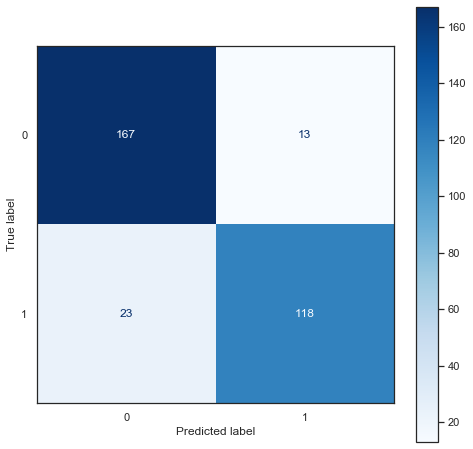

In [102]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(nb_cvec, X_test, y_test, cmap='Blues', ax=ax, values_format = 'd')

In [104]:
tn, fp, fn, tp = confusion_matrix(y_test,preds).ravel()

# Test specificity of our model
spec = tn/(tn+fp)
print(f'Specificity: {round(spec,4)}')

# Test sensitivity of our model
sens = tp/(tp+fn)
print(f'Sensitivity / Precision: {round(sens,4)}')

# Misclassification Rate of our model
misc = (fp+fn)/(tn+fp+fn+tp)
print(f'Misclassification Rate: {round(misc,4)}')

Specificity: 0.9278
Sensitivity / Precision: 0.8369
Misclassification Rate: 0.1121


### Relationship between Specificity and Sensitivity

In [105]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

pred_df.head()

,true_values,pred_probs
641,0,2.006981e-09
924,1,1.000000e+00
1191,1,9.999991e-01
161,0,1.814540e-07
630,0,3.702609e-06


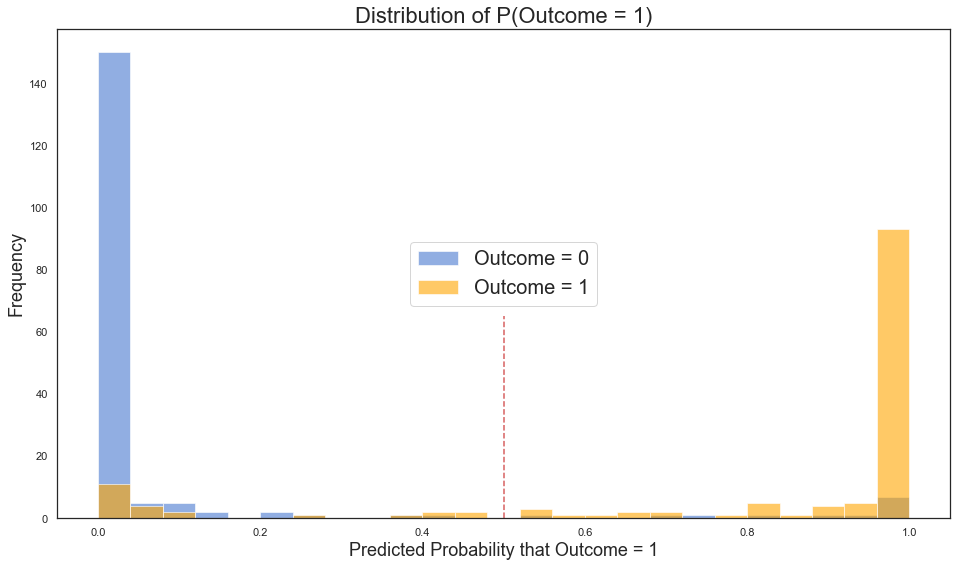

In [106]:
# Creating a histrogram of predicted probability.
plt.figure(figsize = (16,9))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'r',
           linestyle = '--')


# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20, loc='center');

In this above plot, we set the classification threshold from Negative or Positive at 0.5

- True Positive:
    - Items I correctly predict to be positive.
    - The orange bars (actual `1`) that are to the **right** of the black line (predicted `1`).
- True Negative: 
    - Items I correctly predict to be negative.
    - The blue bars (actual `0`) that are to the **left** of the black line (predicted `0`).
- False Positive:
    - Items I incorrectly predict to be positive.
    - The blue bars (actual `0`) that are to the **right** of the black line (predicted `1`).
- False Negative: 
    - Items I incorrectly predict to be negative.
    - The orange bars (actual `1`) that are to the **left** of the black line (predicted `0`).

**Our goal** should be to build a model such that there is **no overlap** between the blue histogram and the orange histogram!

- If there is overlap, we need to recognize the tradeoff between sensitivity and specificity. (As one increases, the other decreases.)
- One measure of how much overlap exists between our distributions is the **area under the ROC curve**.

### Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.
- We start our classification threshold (dashed red line) at 0.
- We calculate sensitivity and 1 - specificity.
- We plot the value of (y = sensitivity, x = 1 - specificity).
- We increase our classification threshold by a small number (like 0.005).
- We calculate sensitivity and 1 - specificity.
- We plot the value of (y = sensitivity, x = 1 - specificity).
- We repeat until our threshold is equal to 1.

In [107]:
# Calculate ROC AUC.
# This measures how distinct the data science and software engineering subreddit posts are
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9382978723404256

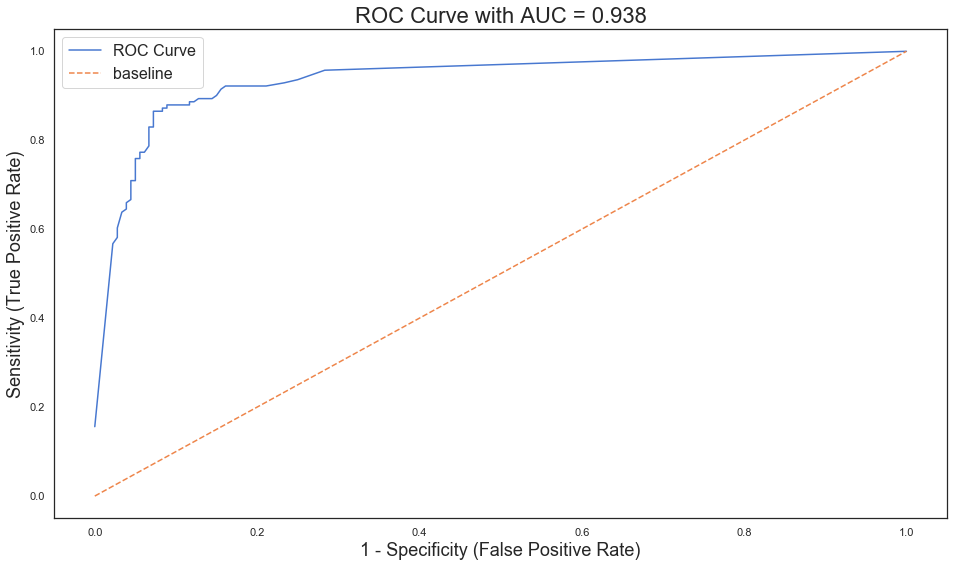

In [108]:
# Creating the area under ROC
plt.figure(figsize = (16,9))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

**Interpreting ROC AUC**
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides. By flipping your predicted values (i.e. flipping predicted 1s and 0s), your ROC AUC will now be above 0.5.

In this case, we have an ROC AUC of 0.938 which is very close to 1 and is thus, a relatively good model. Hence, our model is able to almost perfectly separate positive and negative populations.

### Analysis of Coefficients

Next, we want to find out what words have strong predictor power in determining whether a post is a Data Science or a Software Engineering post based on our model. We can find this out by looking at the coefficient values associated with the words.

In [109]:
# List of words
nb_cvec_coef = gs.best_estimator_.named_steps['cvec'].get_feature_names()
print(len(nb_cvec_coef))
nb_cvec_coef[:15]

2000


['abil',
 'abl',
 'abroad',
 'absolut',
 'abstract',
 'academ',
 'academia',
 'acceler',
 'accept',
 'access',
 'account',
 'accredit',
 'accur',
 'accuraci',
 'achiev']

In [110]:
# List of coefficients associated with the list of words
print(len(gs.best_estimator_.named_steps['nb'].coef_[0]))
gs.best_estimator_.named_steps['nb'].coef_[0]

2000


array([ -7.17286185,  -6.38245137,  -8.66093891, ..., -10.09602343,
        -7.81364105, -10.09602343])

In [111]:
# Create a dataframe of features with their corresponding coefficient values
coef_df = pd.DataFrame({'feature':nb_cvec_coef,'coef':gs.best_estimator_.named_steps['nb'].coef_[0]})
coef_df.sort_values(by=['coef'], inplace=True, ascending=False)

The coef_ attribute of MultinomialNB is a re-parameterization of the naive Bayes model as a linear classifier model. For a binary classification problems this is basically the log of the estimated probability of a feature given the positive class. It means that higher values mean more important features for the positive class.

In [112]:
# Top 20 most important features/words
coef_df.head(20)

,feature,coef
1974,work,-4.304841
1891,use,-4.357518
973,like,-4.641557
1983,would,-4.738494
724,get,-4.845846
1089,model,-4.884354
902,job,-4.906405
951,learn,-4.928954
1526,scientist,-5.050021
1932,want,-5.108316


Text(0, 0.5, 'Words')

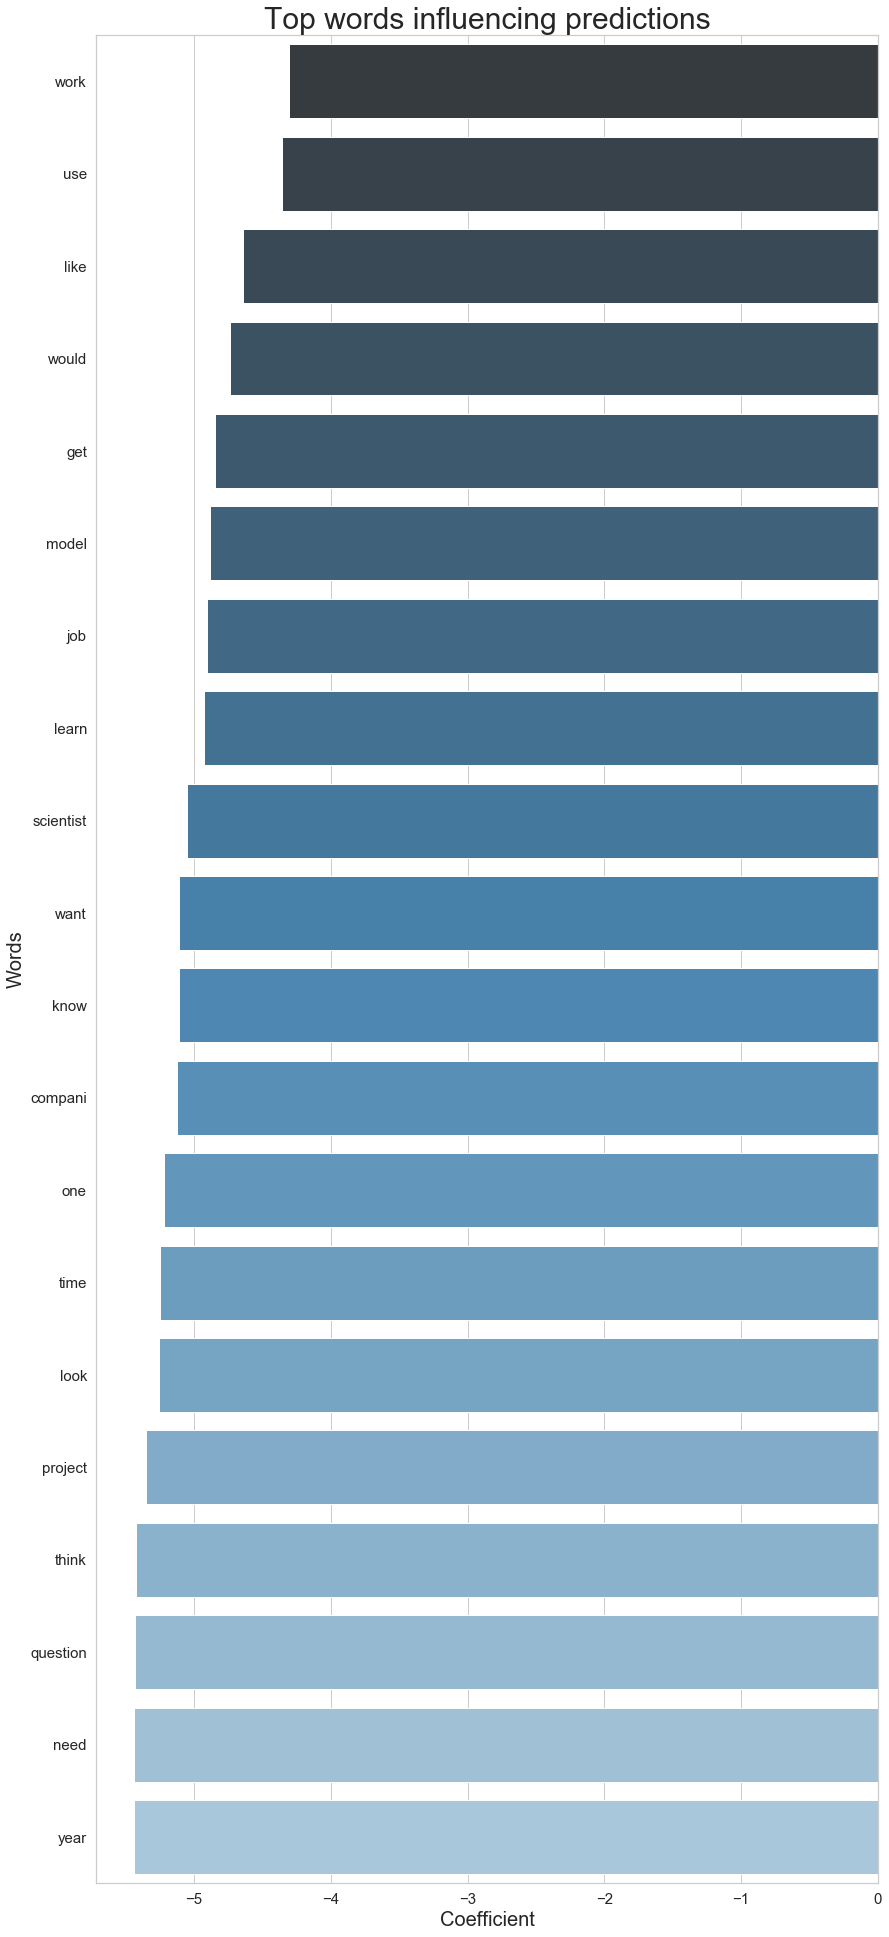

In [113]:
# Visualizing the top 20 words that determine a post belongs to the Data Science Subreddit
sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)})
sns.barplot(y='feature',x='coef', data=coef_df.head(20), palette='Blues_d')
plt.title('Top words influencing predictions', fontsize=30)
plt.tick_params(labelsize=15)
plt.xlabel('Coefficient', fontsize=20)
plt.ylabel('Words', fontsize=20)

Based on our observations, we can infer that words like `work`, `use`, and `like` can be represented as important features to the positive class (Data Science subreddit).

### Misclassified Posts Analysis

Lastly, we will look at posts that were classified incorrectly by our model and analyze the words in such posts to better understand why our model misclassified these posts.

In [114]:
X_train

1228    project got first job self taught prove knowle...
590     maintain object across api deploy instanc work...
654     elect choos head path hi c major colleg offer ...
65      event sourc azur part architectur plan hi post...
980     import r industri day current transit field r ...
                              ...                        
302     visual thread profil visual thread profil see ...
1263    scientist seen better smarter analyst studi bc...
1150    pre meet idol panic huge footbal statist nerd ...
314     build experi help land first job hello qualifi...
572     aw tutori ex aw engin interest x post r webdev...
Name: text, Length: 960, dtype: object

In [115]:
X_test

641     design pattern colleg student studi engin one ...
924     make non technic new hire scientist scientist ...
1191    problem interpret ltv cross valid scheme follo...
161     commun resourc network tip self taught dev sta...
630     learn code start start recommend learn first g...
                              ...                        
969     torn graduat end still unsur direct want go ca...
1074    scientist health care without life scienc degr...
968            graduat colleg statist feel like know noth
1202    build risk simul work fin tech would like buil...
87      develop militari industri alway love fighter j...
Name: text, Length: 321, dtype: object

In [116]:
# Number of Posts in the X_test data set
df_test = pd.merge(X_test, cleaned_df, how='inner', on=['text'])
print(df_test.shape)
df_test

(321, 9)


,text,upvote_ratio,ups,num_comments,subreddit_subscribers,ds,string_count,word_count,original_text
0,design pattern colleg student studi engin one ...,1.00,17,19,24671,0,533,80,Software Design Patterns I'm a college student...
1,make non technic new hire scientist scientist ...,1.00,3,27,285442,1,3223,564,Making non-technical new hires data scientists...
2,problem interpret ltv cross valid scheme follo...,1.00,2,9,285444,1,942,150,Problem interpreting this LTV cross-validation...
3,commun resourc network tip self taught dev sta...,1.00,13,8,24671,0,857,136,Community Resources and Networking Tips For Se...
4,learn code start start recommend learn first g...,1.00,2,5,24671,0,734,138,Learning how to code.. where do I start? Where...
...,...,...,...,...,...,...,...,...,...
316,torn graduat end still unsur direct want go ca...,0.86,54,74,285443,1,1833,334,Torn between data science and software enginee...
317,scientist health care without life scienc degr...,0.89,7,14,285444,1,613,100,Data Scientist in Health Care without a life s...
318,graduat colleg statist feel like know noth,0.97,248,97,285443,1,78,15,I’m about to graduate college in Statistics an...
319,build risk simul work fin tech would like buil...,0.67,1,1,285444,1,564,94,Building a risk simulation I work in fin tech ...


In [117]:
print(len(preds))
preds

321


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [118]:
# Create a new column in our df that indicates which group the model predicted these posts to be in
df_test['predicted'] = preds

In [119]:
misclassified_posts = df_test[df_test['ds']!=df_test['predicted']]
print(len(misclassified_posts))
misclassified_posts

36


,text,upvote_ratio,ups,num_comments,subreddit_subscribers,ds,string_count,word_count,original_text,predicted
5,big er diagram assign creat first er diagram c...,0.67,1,3,24671,0,259,52,How big should an ER Diagram be? I was assigne...,1
23,compani want use autom platform leav career pr...,0.87,6,12,285444,1,918,170,Company wants to use automated data science pl...,0
28,recogn tire posit silhouett car hi x b task re...,0.75,4,2,24671,0,991,170,Recognizing tire position and silhouette of ca...,1
60,get product project manag skill mani job offer...,1.00,3,7,285444,1,374,67,How to get product/project Management Skills? ...,0
80,like improv basic knowledg hey guy septemb sta...,0.75,2,6,285442,1,684,103,I'd like to improve my basic knowledge Hey guy...,0
82,leav corpor engin job recent join telecom corp...,0.92,18,18,24671,0,2088,400,Do I leave my corporate software engineer job ...,1
88,anecdot speak highest pay seen scientist speak...,0.78,5,32,285442,1,471,84,"Anecdotally speaking, what is the highest pay ...",0
102,congratul reach next step analysi biomed resea...,0.84,24,13,285442,1,2383,413,Congratulations on reaching the next step I’ve...,0
104,nyr confer worth virtual want get peopl though...,0.67,1,2,285444,1,388,65,NYR Conference - worth it? Virtual Just want t...,0
108,hobbi notic sub lot peopl wonder career ask wh...,0.86,10,13,285442,1,492,92,Data Science as a Hobby I've noticed on this s...,0


Based on the confusion matrix plotted earlier on, our best model resulted in 13 False Positives and 23 False Negatives. In total we have 13 + 23 = 36 misclassified posts.

#### False Positives (Type I Error) - SWE Posts that were predicted to be DS Posts

In [125]:
fp_posts = df_test[df_test['ds']== 0]
fp_posts = fp_posts[fp_posts['predicted'] == 1]
print(len(fp_posts))
fp_posts.head()

13


,text,upvote_ratio,ups,num_comments,subreddit_subscribers,ds,string_count,word_count,original_text,predicted
5,big er diagram assign creat first er diagram c...,0.67,1,3,24671,0,259,52,How big should an ER Diagram be? I was assigne...,1
28,recogn tire posit silhouett car hi x b task re...,0.75,4,2,24671,0,991,170,Recognizing tire position and silhouette of ca...,1
82,leav corpor engin job recent join telecom corp...,0.92,18,18,24671,0,2088,400,Do I leave my corporate software engineer job ...,1
117,need help regard requir cours ask work mini pr...,0.57,1,2,24671,0,496,82,Need help regarding Requirements Engineering F...,1
142,machin learn artifici intellig resourc school ...,1.00,1,3,24671,0,411,63,Machine learning / Artificial intelligence res...,1


In [121]:
cvec = CountVectorizer(min_df = 2, stop_words='english')

cvec.fit(fp_posts['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame
fp_words = pd.DataFrame(cvec.transform(fp_posts['text']).todense(),
                       columns=cvec.get_feature_names())

# Finding the top 100 words that frequently appeared in data science subreddits
fp_top = fp_words.sum(axis = 0).sort_values(ascending = False).head(30)
fp_top

use         11
tool        10
job          8
like         7
work         7
year         6
requir       6
hire         6
learn        6
make         6
big          5
want         5
help         5
know         4
contain      4
tri          4
need         4
engin        4
check        4
control      3
document     3
compil       3
everi        3
experi       3
given        3
compani      3
instal       3
machin       3
ask          3
model        3
dtype: int64

On an aggregate level, the reason these SWE posts were misclassified as DS posts can be attributed to the types of words they included in their posts. Specifically, these posts used common words across both subreddits like `use`, `job`, `work`, `learn` as well as DS specific words like `model`. Without conducting further granular analysis into these posts, these are the general assumptions we can make to explain why these posts were misclassified.

#### False Negatives (Type II Error) - DS Posts that were predicted to be SWE Posts

In [124]:
fn_posts = df_test[df_test['ds']== 1]
fn_posts = fn_posts[fn_posts['predicted'] == 0]
print(len(fn_posts))
fn_posts.head()

23


,text,upvote_ratio,ups,num_comments,subreddit_subscribers,ds,string_count,word_count,original_text,predicted
23,compani want use autom platform leav career pr...,0.87,6,12,285444,1,918,170,Company wants to use automated data science pl...,0
60,get product project manag skill mani job offer...,1.00,3,7,285444,1,374,67,How to get product/project Management Skills? ...,0
80,like improv basic knowledg hey guy septemb sta...,0.75,2,6,285442,1,684,103,I'd like to improve my basic knowledge Hey guy...,0
88,anecdot speak highest pay seen scientist speak...,0.78,5,32,285442,1,471,84,"Anecdotally speaking, what is the highest pay ...",0
102,congratul reach next step analysi biomed resea...,0.84,24,13,285442,1,2383,413,Congratulations on reaching the next step I’ve...,0


In [123]:
cvec.fit(fn_posts['text'])

fn_words = pd.DataFrame(cvec.transform(fn_posts['text']).todense(),
                       columns=cvec.get_feature_names())

# Finding the top 100 words that frequently appeared in data science subreddits
fn_top = fn_words.sum(axis = 0).sort_values(ascending = False).head(30)
fn_top

work         43
project      20
task         18
job          18
learn        18
use          16
like         13
realli       13
analysi      13
code         13
manag        12
want         12
need         11
scientist    11
think        10
compani      10
career       10
way          10
post         10
com           9
make          9
someth        9
thing         9
year          9
develop       8
session       8
know          8
start         8
stori         8
question      8
dtype: int64

On an aggregate level, the reason these DS posts were misclassified as SWE posts can be attributed to the types of words they included in their posts. Specifically, these posts used common words across both subreddits like `use`, `job`, `work`, `learn` as well as SWE specific words like `code`, `develop` and `start`. Without conducting further granular analysis into these posts, these are the general assumptions we can make to explain why these posts were misclassified.

## Conclusion

### Findings

- After running our data through 10 possible model combinations, I managed to achieve the **highest accuracy (testing) score of 88.8%** in predicting which subreddit a post came from using the `MultinomialNB` - `CvecVectorizer` model combination. The rest of the model scores are as follows:
    - **Specificity**: 92.8%
    - **Precision**: 83.7%
    - **Misclassification Rate**: 11.2%
    - **ROC/AUC Score**: 93.8%


- Using GridSearchCV, the best hyperparameters for this particular model is:
    - 'cvec__max_df': 0.6,
    - 'cvec__max_features': 2000,
    - 'cvec__min_df': 2,
    - 'cvec__ngram_range': (1, 1),
    - 'nb__alpha': 0.25}
    
    
- Our model has successfully classified most of the cases to the correct subreddit, in fact, up to 88.8% of the subreddit posts. However, I also have discussed on the importance of reducing the number of False Negative (Type-II error), but the reduction has to be done at the cost increasing False Positive (Type-I error). The trade-off can be seen from our AUC-ROC Curve Diagram. With 88.8% accuracy, our data science marketing team will be able to better target people interested in these topics using certain prominent keywords that appear more frequently in one subreddit over the other and vice versa.


- From our Data Visualizations and Misclassified Post Analysis, we have identified Data Science Subreddit to have key words like `model`, `scientist`, `python`, `question`. On the other hand, Software Engineering Subreddit appears to have key words like `code`, `develop`, `start`, `engin`. Understanding the importance of these words in subreddit posts allows the models to better predict which posts belong to which subreddits.

## Recommendations

- When it comes to modelling, having more rows of data will improve our modelling accuracy scores. To increase our data size, one other area where we can scrape more text data is scraping the comments section of subreddit threads. This can be done using other APIs.


- To reduce our misclassification rate for our models, we can identify common words that appear within both subreddits that contribute to the misclassification of posts and remove such words during our pre-processing stage when cleaning our data. This was not done in the scope of this project but could be done to further improve our model scores in the future.